# Business Intelligence Analysis: Supply Chain Data

#### Ali Akbar Qumainy (23611121)
#### Link Visualisasi https://uas-bi-aliakbarq23611121.streamlit.app/


# 1. Extract, Transform, Load (ETL)

---

Proses ETL merupakan tahapan fundamental dalam Business Intelligence yang terdiri dari tiga langkah utama:

| Tahap | Deskripsi |
|-------|-----------|
| **Extract** | Data diekstrak dari berbagai sumber (database, file, API) |
| **Transform** | Data ditransformasi sesuai kebutuhan analisis |
| **Load** | Data yang telah bersih dimuat ke sistem untuk analisis |

### Extracting Data

Pada tahap ini, data diekstrak dari file CSV yang berisi informasi supply chain. Proses ekstraksi dilakukan menggunakan library pandas yang memungkinkan pembacaan data dalam format tabular.

In [1]:
# Import library yang diperlukan untuk analisis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# =====================================================
# EXTRACT: Data diekstrak dari file CSV
# =====================================================
file_path = 'supply_chain_data.csv'
df = pd.read_csv(file_path)

# Informasi dasar dataset ditampilkan untuk verifikasi
print("=" * 60)
print("DATA EXTRACTION COMPLETED")
print("=" * 60)
print(f"\n📁 Sumber Data    : {file_path}")
print(f"📊 Jumlah Baris   : {df.shape[0]:,}")
print(f"📋 Jumlah Kolom   : {df.shape[1]}")
print(f"\n📝 Daftar Kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print("\n" + "=" * 60)
print("SAMPLE DATA (5 Baris Pertama)")
print("=" * 60)
df.head()

DATA EXTRACTION COMPLETED

📁 Sumber Data    : supply_chain_data.csv
📊 Jumlah Baris   : 100
📋 Jumlah Kolom   : 24

📝 Daftar Kolom:
    1. Product type
    2. SKU
    3. Price
    4. Availability
    5. Number of products sold
    6. Revenue generated
    7. Customer demographics
    8. Stock levels
    9. Lead times
   10. Order quantities
   11. Shipping times
   12. Shipping carriers
   13. Shipping costs
   14. Supplier name
   15. Location
   16. Lead time
   17. Production volumes
   18. Manufacturing lead time
   19. Manufacturing costs
   20. Inspection results
   21. Defect rates
   22. Transportation modes
   23. Routes
   24. Costs

SAMPLE DATA (5 Baris Pertama)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


### Transforming Data to Fit Analytic Needs

Pada tahap transformasi, beberapa operasi dilakukan untuk mempersiapkan data agar sesuai dengan kebutuhan analisis:

- Kolom-kolom turunan seperti Total Cost, Profit, dan ROI dihitung
- Data diagregasi berdasarkan kategori untuk analisis ringkas
- Nilai-nilai dinormalisasi untuk konsistensi analisis

In [2]:
# =====================================================
# TRANSFORM: Data ditransformasi sesuai kebutuhan analisis
# =====================================================

# 1. Pengecekan nilai kosong (missing values) dilakukan
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage (%)': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0] if missing_values.sum() > 0 else "✅ Tidak ditemukan missing values")

# 2. Kolom-kolom baru dihitung untuk analisis bisnis
print("\n" + "=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# Total Biaya dihitung (Manufacturing + Shipping)
df['Total Cost'] = df['Manufacturing costs'] + df['Shipping costs']
print("✅ Kolom 'Total Cost' telah ditambahkan")

# Profit dihitung (Revenue - Total Cost)
df['Profit'] = df['Revenue generated'] - df['Total Cost']
print("✅ Kolom 'Profit' telah ditambahkan")

# ROI (Return on Investment) dihitung dalam persentase
df['ROI (%)'] = ((df['Profit'] / df['Total Cost']) * 100).round(2)
print("✅ Kolom 'ROI (%)' telah ditambahkan")

# Profit Margin dihitung
df['Profit Margin (%)'] = ((df['Profit'] / df['Revenue generated']) * 100).round(2)
print("✅ Kolom 'Profit Margin (%)' telah ditambahkan")

# 3. Data diagregasi berdasarkan Product Type
print("\n" + "=" * 60)
print("AGGREGATED SUMMARY BY PRODUCT TYPE")
print("=" * 60)
summary_by_product = df.groupby('Product type').agg({
    'Revenue generated': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Number of products sold': 'sum',
    'Defect rates': 'mean',
    'ROI (%)': 'mean'
}).round(2)

summary_by_product.columns = ['Total Revenue', 'Avg Revenue', 'Total Profit', 
                               'Avg Profit', 'Total Sold', 'Avg Defect Rate', 'Avg ROI']
summary_by_product

MISSING VALUES ANALYSIS
✅ Tidak ditemukan missing values

FEATURE ENGINEERING
✅ Kolom 'Total Cost' telah ditambahkan
✅ Kolom 'Profit' telah ditambahkan
✅ Kolom 'ROI (%)' telah ditambahkan
✅ Kolom 'Profit Margin (%)' telah ditambahkan

AGGREGATED SUMMARY BY PRODUCT TYPE


,Total Revenue,Avg Revenue,Total Profit,Avg Profit,Total Sold,Avg Defect Rate,Avg ROI
Product type,,,,,,,
cosmetics,161521.27,6212.36,160244.33,6163.24,11757,1.92,17340.30
haircare,174455.39,5131.04,172606.96,5076.68,13611,2.48,12846.30
skincare,241628.16,6040.70,239472.05,5986.80,20731,2.33,27768.13


### Loading Data into Business Systems for Analysis

Pada tahap loading, data hasil transformasi disimpan ke dalam file CSV

In [3]:
# =====================================================
# LOAD: Data hasil transformasi dimuat ke sistem penyimpanan
# =====================================================

# File utama disimpan dengan kolom-kolom baru
output_file = 'transformed_supply_chain_data.csv'
df.to_csv(output_file, index=False)

# Ringkasan analisis disimpan secara terpisah
summary_file = 'product_analysis_summary.csv'
summary_by_product.to_csv(summary_file)

print("=" * 60)
print("DATA LOADING COMPLETED")
print("=" * 60)
print(f"\n✅ File utama berhasil disimpan    : {output_file}")
print(f"✅ File ringkasan berhasil disimpan : {summary_file}")
print(f"\n📊 Total kolom pada data akhir: {df.shape[1]}")
print(f"📋 Kolom baru yang ditambahkan:")
print("   - Total Cost")
print("   - Profit")
print("   - ROI (%)")
print("   - Profit Margin (%)")

DATA LOADING COMPLETED

✅ File utama berhasil disimpan    : transformed_supply_chain_data.csv
✅ File ringkasan berhasil disimpan : product_analysis_summary.csv

📊 Total kolom pada data akhir: 28
📋 Kolom baru yang ditambahkan:
   - Total Cost
   - Profit
   - ROI (%)
   - Profit Margin (%)


# 2. Data Cleaning

---

Data Cleaning merupakan proses penting untuk memastikan kualitas data yang digunakan dalam analisis. Proses ini meliputi:

| Tahap | Deskripsi |
|-------|-----------|
| **Summarizing** | Data diringkas untuk inspeksi awal |
| **Finding Flaws** | Data yang bermasalah diidentifikasi dan diperbaiki |
| **Type Conversion** | Tipe data dikonversi ke format yang sesuai |
| **Standardization** | Variabel string distandarisasi |

Data yang bersih akan menghasilkan analisis yang lebih akurat dan dapat diandalkan.

### 2.1 Summarizing Data for Inspection

Pada tahap ini, data diringkas untuk memberikan gambaran umum mengenai karakteristik dataset.

In [4]:
# =====================================================
# DATA SUMMARIZATION: Ringkasan data untuk inspeksi
# =====================================================

print("=" * 70)
print("DATA STRUCTURE OVERVIEW")
print("=" * 70)

# Informasi struktur data ditampilkan
print(f"\n📊 Dimensi Dataset: {df.shape[0]:,} baris × {df.shape[1]} kolom")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Tipe data setiap kolom diidentifikasi
print("\n" + "-" * 70)
print("TIPE DATA PER KOLOM")
print("-" * 70)
dtype_summary = df.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"   {dtype}: {count} kolom")

# Statistik deskriptif untuk kolom numerik dihitung
print("\n" + "=" * 70)
print("DESCRIPTIVE STATISTICS (Numerical Columns)")
print("=" * 70)
display(df.describe().round(2))

# Jumlah duplikat diidentifikasi
print("\n" + "=" * 70)
print("DUPLICATE ANALYSIS")
print("=" * 70)
duplicates = df.duplicated().sum()
print(f"🔍 Jumlah baris duplikat: {duplicates}")
print(f"📊 Persentase duplikat: {(duplicates/len(df)*100):.2f}%")

# Distribusi missing values dianalisis
print("\n" + "=" * 70)
print("MISSING VALUES DISTRIBUTION")
print("=" * 70)
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Null (%)': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Data Type': df.dtypes.values
})
display(missing_info)

DATA STRUCTURE OVERVIEW

📊 Dimensi Dataset: 100 baris × 28 kolom
💾 Memory Usage: 71.08 KB

----------------------------------------------------------------------
TIPE DATA PER KOLOM
----------------------------------------------------------------------
   float64: 10 kolom
   object: 9 kolom
   int64: 9 kolom

DESCRIPTIVE STATISTICS (Numerical Columns)


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs,Total Cost,Profit,ROI (%),Profit Margin (%)
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,49.46,48.40,460.99,5776.05,47.77,15.96,49.22,5.75,5.55,17.08,567.84,14.77,47.27,2.28,529.25,52.81,5723.23,19983.47,98.62
std,31.17,30.74,303.78,2732.84,31.37,8.79,26.78,2.72,2.65,8.85,263.05,8.91,28.98,1.46,258.30,29.12,2739.39,26307.17,1.39
min,1.70,1.00,8.00,1061.62,0.00,1.00,1.00,1.00,1.01,1.00,104.00,1.00,1.09,0.02,103.92,4.97,1052.42,1516.54,93.81
25%,19.60,22.75,184.25,2812.85,16.75,8.00,26.00,3.75,3.54,10.00,352.00,7.00,22.98,1.01,318.78,29.66,2751.79,5365.50,98.17
50%,51.24,43.50,392.50,6006.35,47.50,17.00,52.00,6.00,5.32,18.00,568.50,14.00,45.91,2.14,520.43,49.93,5958.07,10924.03,99.10
75%,77.20,75.00,704.25,8253.98,73.00,24.00,71.25,8.00,7.60,25.00,797.00,23.00,68.62,3.56,763.08,76.28,8178.86,19384.08,99.49
max,99.17,100.00,996.00,9866.47,100.00,30.00,96.00,10.00,9.93,30.00,985.00,30.00,99.47,4.94,997.41,107.37,9847.49,157446.14,99.94



DUPLICATE ANALYSIS
🔍 Jumlah baris duplikat: 0
📊 Persentase duplikat: 0.00%

MISSING VALUES DISTRIBUTION


,Column,Non-Null Count,Null Count,Null (%),Data Type
0,Product type,100,0,0.0,object
1,SKU,100,0,0.0,object
2,Price,100,0,0.0,float64
3,Availability,100,0,0.0,int64
4,Number of products sold,100,0,0.0,int64
5,Revenue generated,100,0,0.0,float64
6,Customer demographics,100,0,0.0,object
7,Stock levels,100,0,0.0,int64
8,Lead times,100,0,0.0,int64
9,Order quantities,100,0,0.0,int64


### 2.2 Finding and Fixing Flawed Data

Pada tahap ini, data yang bermasalah diidentifikasi dan diperbaiki. Proses yang dilakukan meliputi:
- Data duplikat dihapus untuk menghindari bias
- Nilai kosong diisi dengan median
- Nilai kosong diisi dengan 'Unknown'
- Nilai ekstrem diidentifikasi menggunakan metode IQR

In [5]:
# =====================================================
# FINDING AND FIXING FLAWED DATA
# =====================================================

print("=" * 70)
print("DATA CLEANING PROCESS")
print("=" * 70)

# Jumlah data sebelum cleaning dicatat
initial_rows = len(df)

# 1. Duplikat dihapus
df = df.drop_duplicates()
rows_after_dedup = len(df)
removed_duplicates = initial_rows - rows_after_dedup
print(f"\n✅ Duplikat dihapus: {removed_duplicates} baris")

# 2. Missing values pada kolom numerik diisi dengan median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"✅ Missing values pada '{col}' diisi dengan median: {median_val:.2f}")

# 3. Missing values pada kolom kategorikal diisi dengan 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        df[col] = df[col].fillna('Unknown')
        print(f"✅ Missing values pada '{col}' diisi dengan 'Unknown'")

# 4. Outliers diidentifikasi menggunakan metode IQR
print("\n" + "-" * 70)
print("OUTLIER DETECTION (IQR Method)")
print("-" * 70)

outlier_summary = []
key_numeric_cols = ['Price', 'Revenue generated', 'Shipping costs', 'Defect rates']

for col in key_numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
        outlier_summary.append({
            'Column': col,
            'Lower Bound': round(lower_bound, 2),
            'Upper Bound': round(upper_bound, 2),
            'Outliers Count': outliers,
            'Outliers (%)': round(outliers/len(df)*100, 2)
        })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

print("\n" + "=" * 70)
print("DATA CLEANING COMPLETED")
print("=" * 70)
print(f"📊 Baris sebelum cleaning: {initial_rows:,}")
print(f"📊 Baris setelah cleaning: {len(df):,}")

DATA CLEANING PROCESS

✅ Duplikat dihapus: 0 baris

----------------------------------------------------------------------
OUTLIER DETECTION (IQR Method)
----------------------------------------------------------------------


,Column,Lower Bound,Upper Bound,Outliers Count,Outliers (%)
0,Price,-66.80,163.60,0,0.0
1,Revenue generated,-5348.85,16415.67,0,0.0
2,Shipping costs,-2.55,13.69,0,0.0
3,Defect rates,-2.82,7.40,0,0.0



DATA CLEANING COMPLETED
📊 Baris sebelum cleaning: 100
📊 Baris setelah cleaning: 100


## 2.3 Converting Inputs to Data Types Suitable for Analysis

Pada tahap ini, tipe data dikonversi ke format yang optimal untuk analisis:
- **Kolom numerik** - Dipastikan bertipe float/integer
- **Kolom kategorikal** - Dikonversi ke tipe 'category' untuk efisiensi memori
- **Kolom tanggal** - Dikonversi ke tipe datetime (jika ada)

In [6]:
# =====================================================
# DATA TYPE CONVERSION
# =====================================================

print("=" * 70)
print("DATA TYPE CONVERSION")
print("=" * 70)

# Memory usage sebelum konversi dicatat
memory_before = df.memory_usage(deep=True).sum() / 1024

# 1. Kolom numerik dipastikan memiliki tipe yang sesuai
numeric_columns = ['Price', 'Revenue generated', 'Shipping costs', 'Lead time', 
                   'Defect rates', 'Production volumes', 'Manufacturing costs']

for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("✅ Kolom numerik telah dikonversi")

# 2. Kolom kategorikal dikonversi ke tipe 'category'
category_columns = ['Product type', 'Customer demographics', 'Location', 
                    'Inspection results', 'Shipping carriers', 'Transportation modes']

for col in category_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("✅ Kolom kategorikal telah dikonversi ke tipe 'category'")

# Memory usage setelah konversi dicatat
memory_after = df.memory_usage(deep=True).sum() / 1024
memory_saved = ((memory_before - memory_after) / memory_before * 100)

print("\n" + "-" * 70)
print("MEMORY OPTIMIZATION RESULTS")
print("-" * 70)
print(f"💾 Memory sebelum: {memory_before:.2f} KB")
print(f"💾 Memory sesudah: {memory_after:.2f} KB")
print(f"📉 Memory saved: {memory_saved:.1f}%")

print("\n" + "-" * 70)
print("FINAL DATA TYPES")
print("-" * 70)
df.dtypes

DATA TYPE CONVERSION
✅ Kolom numerik telah dikonversi
✅ Kolom kategorikal telah dikonversi ke tipe 'category'

----------------------------------------------------------------------
MEMORY OPTIMIZATION RESULTS
----------------------------------------------------------------------
💾 Memory sebelum: 71.08 KB
💾 Memory sesudah: 36.58 KB
📉 Memory saved: 48.5%

----------------------------------------------------------------------
FINAL DATA TYPES
----------------------------------------------------------------------


Product type               category
SKU                          object
Price                       float64
Availability                  int64
Number of products sold       int64
Revenue generated           float64
Customer demographics      category
Stock levels                  int64
Lead times                    int64
Order quantities              int64
Shipping times                int64
Shipping carriers          category
Shipping costs              float64
Supplier name                object
Location                   category
Lead time                     int64
Production volumes            int64
Manufacturing lead time       int64
Manufacturing costs         float64
Inspection results         category
Defect rates                float64
Transportation modes       category
Routes                       object
Costs                       float64
Total Cost                  float64
Profit                      float64
ROI (%)                     float64
Profit Margin (%)           

### 2.4 Adapting String Variables to a Standard

Pada tahap ini, variabel string distandarisasi untuk memastikan konsistensi:
- **Whitespace** - Spasi berlebih di awal/akhir dihapus
- **Case Format** - Teks diubah ke Title Case untuk uniformitas
- **Nilai unik** - Setelah standarisasi, nilai unik diverifikasi

In [7]:
# =====================================================
# STRING STANDARDIZATION
# =====================================================

print("=" * 70)
print("STRING VARIABLE STANDARDIZATION")
print("=" * 70)

# Kolom string yang perlu distandarisasi
string_columns = ['Supplier name', 'Location', 'Transportation modes', 'Routes']

for col in string_columns:
    if col in df.columns:
        # Whitespace dihapus dan Title Case diterapkan
        df[col] = df[col].astype(str).str.strip().str.title()

print("✅ Standarisasi string telah selesai dilakukan")

# Verifikasi nilai unik setelah standarisasi
print("\n" + "-" * 70)
print("UNIQUE VALUES AFTER STANDARDIZATION")
print("-" * 70)

for col in string_columns:
    if col in df.columns:
        unique_vals = df[col].unique()
        print(f"\n📋 {col}:")
        print(f"   Jumlah nilai unik: {len(unique_vals)}")
        print(f"   Nilai: {list(unique_vals)}")

# Ringkasan akhir data cleaning
print("\n" + "=" * 70)
print("DATA CLEANING SUMMARY")
print("=" * 70)
print(f"✅ Total baris: {len(df):,}")
print(f"✅ Total kolom: {df.shape[1]}")
print(f"✅ Missing values: {df.isnull().sum().sum()}")
print(f"✅ Duplikat: {df.duplicated().sum()}")

STRING VARIABLE STANDARDIZATION
✅ Standarisasi string telah selesai dilakukan

----------------------------------------------------------------------
UNIQUE VALUES AFTER STANDARDIZATION
----------------------------------------------------------------------

📋 Supplier name:
   Jumlah nilai unik: 5
   Nilai: ['Supplier 3', 'Supplier 1', 'Supplier 5', 'Supplier 4', 'Supplier 2']

📋 Location:
   Jumlah nilai unik: 5
   Nilai: ['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai']

📋 Transportation modes:
   Jumlah nilai unik: 4
   Nilai: ['Road', 'Air', 'Rail', 'Sea']

📋 Routes:
   Jumlah nilai unik: 3
   Nilai: ['Route B', 'Route C', 'Route A']

DATA CLEANING SUMMARY
✅ Total baris: 100
✅ Total kolom: 28
✅ Missing values: 0
✅ Duplikat: 0


# 3. Exploratory Data Analysis (EDA)

---

Exploratory Data Analysis (EDA) merupakan pendekatan untuk menganalisis data dengan tujuan merangkum karakteristik utama menggunakan metode visual. EDA membantu dalam memahami pola, mendeteksi anomali, dan memformulasikan hipotesis untuk analisis lanjutan.

### 3.1 Implementing Exploratory Data Analysis

Pada tahap implementasi EDA, library visualisasi diimpor dan korelasi antar variabel numerik dianalisis menggunakan heatmap. Matriks korelasi memberikan gambaran awal mengenai hubungan linier antar variabel.

CORRELATION ANALYSIS


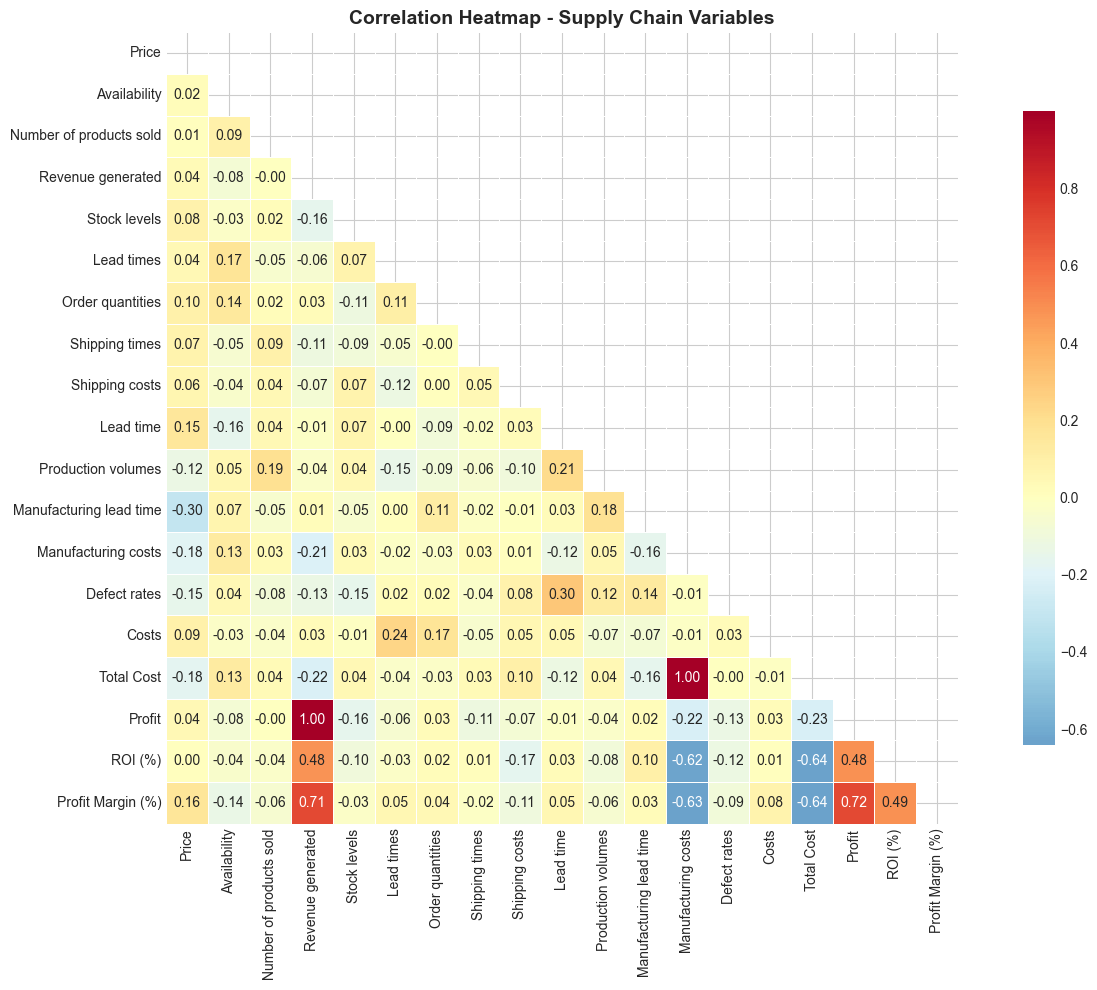


📊 Top 5 Korelasi Positif Tertinggi:
Profit               Revenue generated      0.999946
Revenue generated    Profit                 0.999946
Manufacturing costs  Total Cost             0.995846
Total Cost           Manufacturing costs    0.995846
Profit               Profit Margin (%)      0.717466

📊 Top 5 Korelasi Negatif Terendah:
Manufacturing costs  Profit Margin (%)   -0.633696
ROI (%)              Total Cost          -0.637004
Total Cost           ROI (%)             -0.637004
                     Profit Margin (%)   -0.640357
Profit Margin (%)    Total Cost          -0.640357


In [8]:
# =====================================================
# EXPLORATORY DATA ANALYSIS IMPLEMENTATION
# =====================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Style visualisasi dikonfigurasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("=" * 70)
print("CORRELATION ANALYSIS")
print("=" * 70)

# Matriks korelasi dihitung untuk variabel numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Heatmap korelasi divisualisasikan
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            fmt='.2f',
            linewidths=0.5,
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Supply Chain Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Korelasi tertinggi diidentifikasi
print("\n📊 Top 5 Korelasi Positif Tertinggi:")
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1].sort_values(ascending=False)
print(corr_pairs.head(5).to_string())

print("\n📊 Top 5 Korelasi Negatif Terendah:")
print(corr_pairs.tail(5).to_string())

### 3.2 Analyzing a Single Data Variable (Univariate Analysis)

UNIVARIATE ANALYSIS


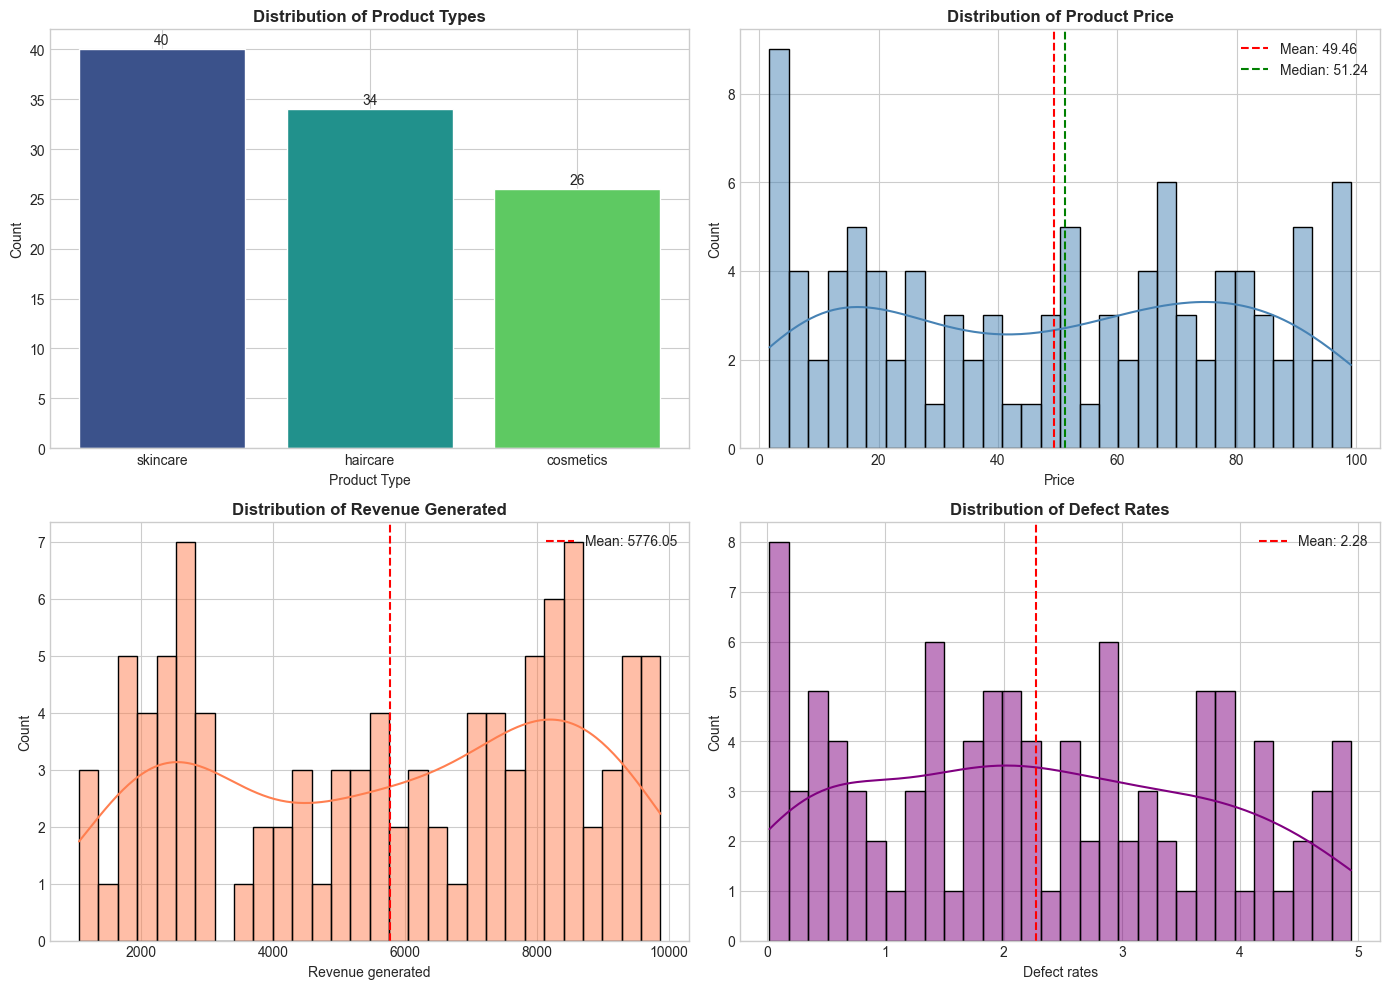


📊 Statistik Univariat - Key Variables:

Price:
   Mean: 49.46 | Median: 51.24 | Std: 31.17

Revenue generated:
   Mean: 5776.05 | Median: 6006.35 | Std: 2732.84

Shipping costs:
   Mean: 5.55 | Median: 5.32 | Std: 2.65

Defect rates:
   Mean: 2.28 | Median: 2.14 | Std: 1.46


In [9]:
# =====================================================
# UNIVARIATE ANALYSIS
# =====================================================

print("=" * 70)
print("UNIVARIATE ANALYSIS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribusi Jenis Produk (Kategorikal)
ax1 = axes[0, 0]
product_counts = df['Product type'].value_counts()
colors = sns.color_palette("viridis", len(product_counts))
bars = ax1.bar(product_counts.index, product_counts.values, color=colors, edgecolor='white')
ax1.set_title('Distribution of Product Types', fontsize=12, fontweight='bold')
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Count')
for bar, val in zip(bars, product_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(val), ha='center', fontsize=10)

# 2. Distribusi Harga Produk (Numerik)
ax2 = axes[0, 1]
sns.histplot(df['Price'], kde=True, color='steelblue', ax=ax2, bins=30)
ax2.axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: {df["Price"].mean():.2f}')
ax2.axvline(df['Price'].median(), color='green', linestyle='--', label=f'Median: {df["Price"].median():.2f}')
ax2.set_title('Distribution of Product Price', fontsize=12, fontweight='bold')
ax2.legend()

# 3. Distribusi Revenue (Numerik)
ax3 = axes[1, 0]
sns.histplot(df['Revenue generated'], kde=True, color='coral', ax=ax3, bins=30)
ax3.axvline(df['Revenue generated'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Revenue generated"].mean():.2f}')
ax3.set_title('Distribution of Revenue Generated', fontsize=12, fontweight='bold')
ax3.legend()

# 4. Distribusi Defect Rates (Numerik)
ax4 = axes[1, 1]
sns.histplot(df['Defect rates'], kde=True, color='purple', ax=ax4, bins=30)
ax4.axvline(df['Defect rates'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df["Defect rates"].mean():.2f}')
ax4.set_title('Distribution of Defect Rates', fontsize=12, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig('univariate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistik ringkasan ditampilkan
print("\n📊 Statistik Univariat - Key Variables:")
key_vars = ['Price', 'Revenue generated', 'Shipping costs', 'Defect rates']
for var in key_vars:
    print(f"\n{var}:")
    print(f"   Mean: {df[var].mean():.2f} | Median: {df[var].median():.2f} | Std: {df[var].std():.2f}")

### 3.3 Analyzing Two Variables Together (Bivariate Analysis)

Pada analisis bivariat, hubungan antara dua variabel dianalisis untuk mengidentifikasi pola dan korelasi

BIVARIATE ANALYSIS


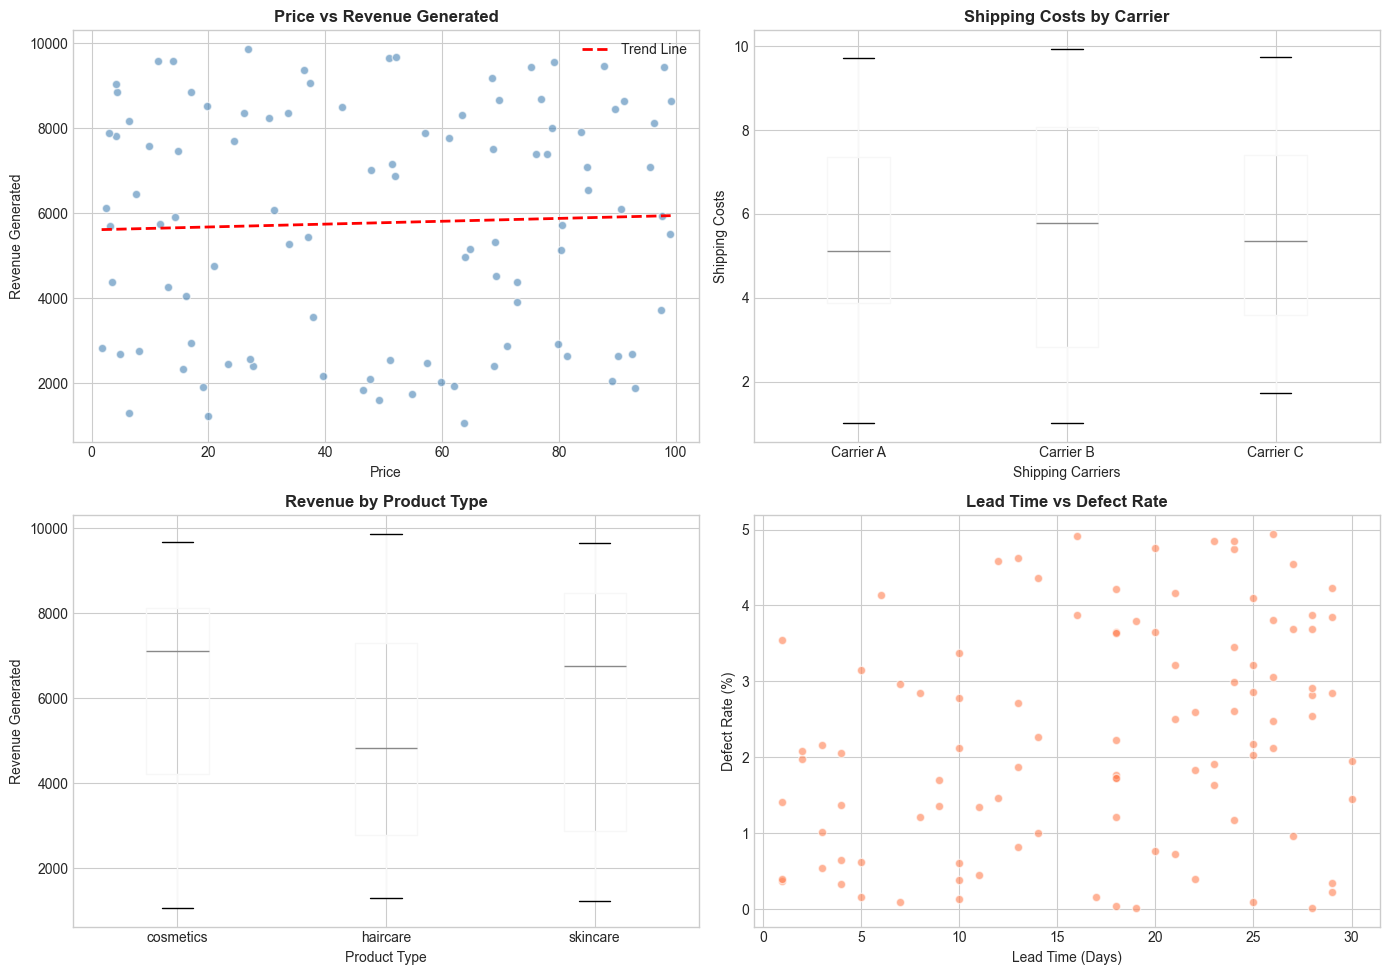


📊 Korelasi Bivariate - Key Pairs:
   Price vs Revenue generated: 0.0384
   Lead time vs Defect rates: 0.2971
   Shipping costs vs Revenue generated: -0.0729
   Production volumes vs Revenue generated: -0.0374


In [10]:
# =====================================================
# BIVARIATE ANALYSIS
# =====================================================

print("=" * 70)
print("BIVARIATE ANALYSIS")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Hubungan Harga vs Pendapatan (Scatter Plot)
ax1 = axes[0, 0]
ax1.scatter(df['Price'], df['Revenue generated'], alpha=0.6, c='steelblue', edgecolors='white')
z = np.polyfit(df['Price'], df['Revenue generated'], 1)
p = np.poly1d(z)
ax1.plot(df['Price'].sort_values(), p(df['Price'].sort_values()), "r--", linewidth=2, label='Trend Line')
ax1.set_xlabel('Price')
ax1.set_ylabel('Revenue Generated')
ax1.set_title('Price vs Revenue Generated', fontsize=12, fontweight='bold')
ax1.legend()

# 2. Biaya Pengiriman per Carrier (Box Plot)
ax2 = axes[0, 1]
df.boxplot(column='Shipping costs', by='Shipping carriers', ax=ax2)
ax2.set_title('Shipping Costs by Carrier', fontsize=12, fontweight='bold')
ax2.set_xlabel('Shipping Carriers')
ax2.set_ylabel('Shipping Costs')
plt.suptitle('')

# 3. Revenue per Product Type (Box Plot)
ax3 = axes[1, 0]
df.boxplot(column='Revenue generated', by='Product type', ax=ax3)
ax3.set_title('Revenue by Product Type', fontsize=12, fontweight='bold')
ax3.set_xlabel('Product Type')
ax3.set_ylabel('Revenue Generated')
plt.suptitle('')

# 4. Lead Time vs Defect Rate (Scatter Plot)
ax4 = axes[1, 1]
ax4.scatter(df['Lead time'], df['Defect rates'], alpha=0.6, c='coral', edgecolors='white')
ax4.set_xlabel('Lead Time (Days)')
ax4.set_ylabel('Defect Rate (%)')
ax4.set_title('Lead Time vs Defect Rate', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('bivariate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Korelasi antara variabel kunci dihitung
print("\n📊 Korelasi Bivariate - Key Pairs:")
pairs = [('Price', 'Revenue generated'), ('Lead time', 'Defect rates'), 
         ('Shipping costs', 'Revenue generated'), ('Production volumes', 'Revenue generated')]
for var1, var2 in pairs:
    corr = df[var1].corr(df[var2])
    print(f"   {var1} vs {var2}: {corr:.4f}")

### 3.4 Exploring Multiple Variables Simultaneously (Multivariate Analysis)

Pada analisis multivariat, interaksi antar beberapa variabel dieksplorasi secara bersamaan

MULTIVARIATE ANALYSIS


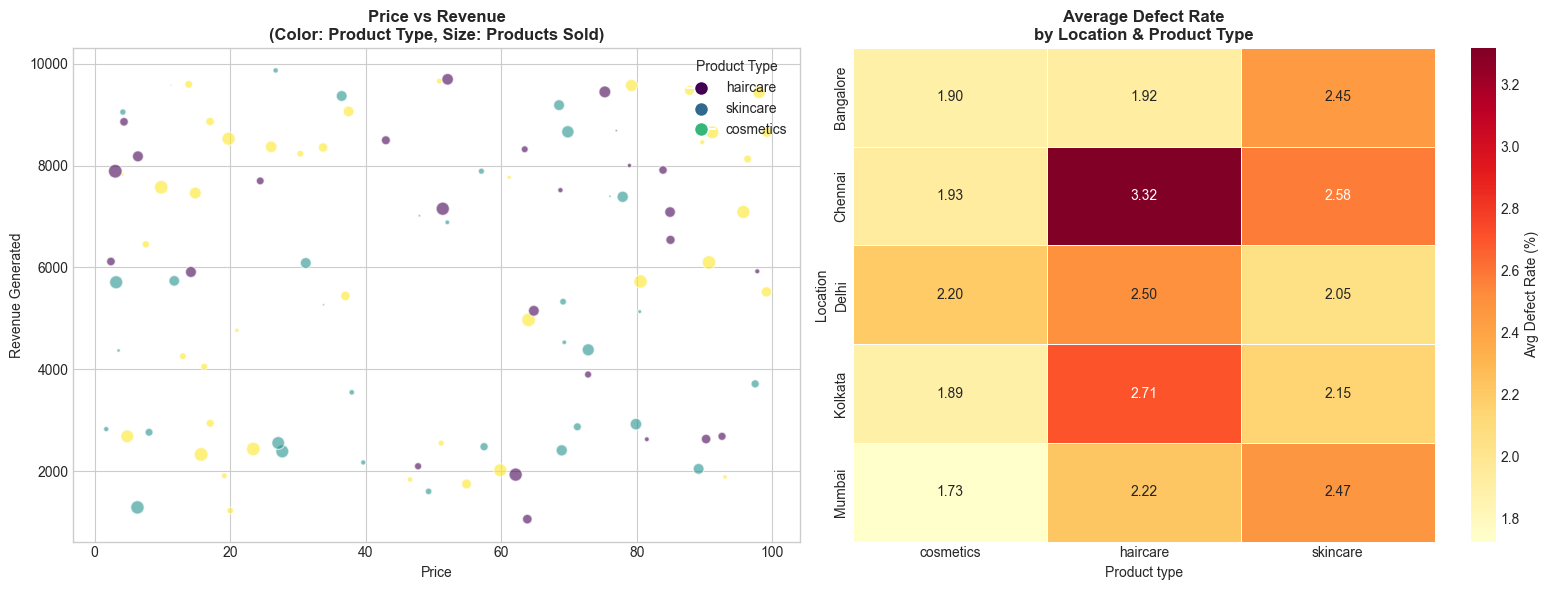


📊 Revenue Analysis by Location & Product Type:


Product type,cosmetics,haircare,skincare
Location,,,
Bangalore,19309.56,51654.35,31637.82
Chennai,31461.95,28723.45,58957.42
Delhi,37429.68,14625.90,28972.12
Kolkata,24163.57,35027.71,77886.27
Mumbai,49156.51,44423.98,44174.54



📊 Average Profit Margin by Transportation & Product:


Product type,cosmetics,haircare,skincare
Transportation modes,,,
Air,98.99,99.07,98.68
Rail,98.62,98.38,98.78
Road,99.32,98.17,97.88
Sea,99.35,97.90,99.03


In [11]:
# =====================================================
# MULTIVARIATE ANALYSIS
# =====================================================

print("=" * 70)
print("MULTIVARIATE ANALYSIS")
print("=" * 70)

# 1. Scatter plot dengan variabel ketiga sebagai warna dan ukuran
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
scatter = ax1.scatter(df['Price'], df['Revenue generated'], 
                      c=df['Product type'].astype('category').cat.codes,
                      s=df['Number of products sold']/10,
                      alpha=0.6, cmap='viridis', edgecolors='white')
ax1.set_xlabel('Price')
ax1.set_ylabel('Revenue Generated')
ax1.set_title('Price vs Revenue\n(Color: Product Type, Size: Products Sold)', 
              fontsize=12, fontweight='bold')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=plt.cm.viridis(i/3), markersize=10,
                              label=cat) for i, cat in enumerate(df['Product type'].unique())]
ax1.legend(handles=legend_elements, title='Product Type', loc='upper right')

# 2. Pivot Table Heatmap - Defect Rate by Location & Product Type
ax2 = axes[1]
pivot_defect = df.pivot_table(values='Defect rates', 
                               index='Location', 
                               columns='Product type', 
                               aggfunc='mean')
sns.heatmap(pivot_defect, annot=True, cmap='YlOrRd', fmt='.2f', 
            linewidths=0.5, ax=ax2, cbar_kws={'label': 'Avg Defect Rate (%)'})
ax2.set_title('Average Defect Rate\nby Location & Product Type', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('multivariate_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# 3. Pivot Table - Revenue by Location & Product Type
print("\n📊 Revenue Analysis by Location & Product Type:")
pivot_revenue = df.pivot_table(values='Revenue generated', 
                                index='Location', 
                                columns='Product type', 
                                aggfunc='sum').round(2)
display(pivot_revenue)

# 4. Profit Margin by Transportation Mode & Product Type
print("\n📊 Average Profit Margin by Transportation & Product:")
pivot_profit = df.pivot_table(values='Profit Margin (%)', 
                               index='Transportation modes', 
                               columns='Product type', 
                               aggfunc='mean').round(2)
display(pivot_profit)

# 4. Linear Regression for Business Cases

---

Linear Regression merupakan teknik statistik untuk memodelkan hubungan linier antara variabel independen (prediktor) dan variabel dependen (target).

### 4.1 Implementing Linear Regression

Pada tahap ini, model regresi linier diimplementasikan menggunakan library statsmodels. Variabel yang digunakan:
- **Variabel Independen (X)**: Number of products sold
- **Variabel Dependen (y)**: Revenue generated

Model OLS (Ordinary Least Squares) diterapkan untuk menemukan garis regresi terbaik.

In [12]:
# =====================================================
# LINEAR REGRESSION IMPLEMENTATION
# =====================================================

import statsmodels.api as sm
from scipy import stats

print("=" * 70)
print("LINEAR REGRESSION MODEL")
print("=" * 70)

# Variabel independen dan dependen didefinisikan
X = df['Number of products sold']
y = df['Revenue generated']

# Konstanta (intercept) ditambahkan ke model
X_const = sm.add_constant(X)

# Model OLS (Ordinary Least Squares) dibangun dan di-fit
model = sm.OLS(y, X_const).fit()

# Ringkasan model ditampilkan
print("\n📊 MODEL SUMMARY")
print("=" * 70)
print(model.summary())

# Koefisien model diekstrak
print("\n" + "=" * 70)
print("MODEL COEFFICIENTS")
print("=" * 70)
print(f"📌 Intercept (β₀): {model.params[0]:.4f}")
print(f"📌 Slope (β₁): {model.params[1]:.4f}")
print(f"\n📐 Persamaan Regresi:")
print(f"   Revenue = {model.params[0]:.2f} + {model.params[1]:.4f} × Products Sold")

LINEAR REGRESSION MODEL

📊 MODEL SUMMARY
                            OLS Regression Results                            
Dep. Variable:      Revenue generated   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0002640
Date:                Mon, 12 Jan 2026   Prob (F-statistic):              0.987
Time:                        22:42:01   Log-Likelihood:                -932.70
No. Observations:                 100   AIC:                             1869.
Df Residuals:                      98   BIC:                             1875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## 4.2 Checking Model Assumptions

Model regresi linier memiliki beberapa asumsi yang harus dipenuhi untuk menghasilkan estimasi yang valid:

1. **Linearitas** - Hubungan antara X dan Y harus linier
2. **Normalitas Residual** - Residual harus terdistribusi normal
3. **Homoskedastisitas** - Varians residual harus konstan
4. **Independensi** - Residual harus independen satu sama lain

Asumsi-asumsi ini diverifikasi melalui visualisasi dan uji statistik.

CHECKING MODEL ASSUMPTIONS


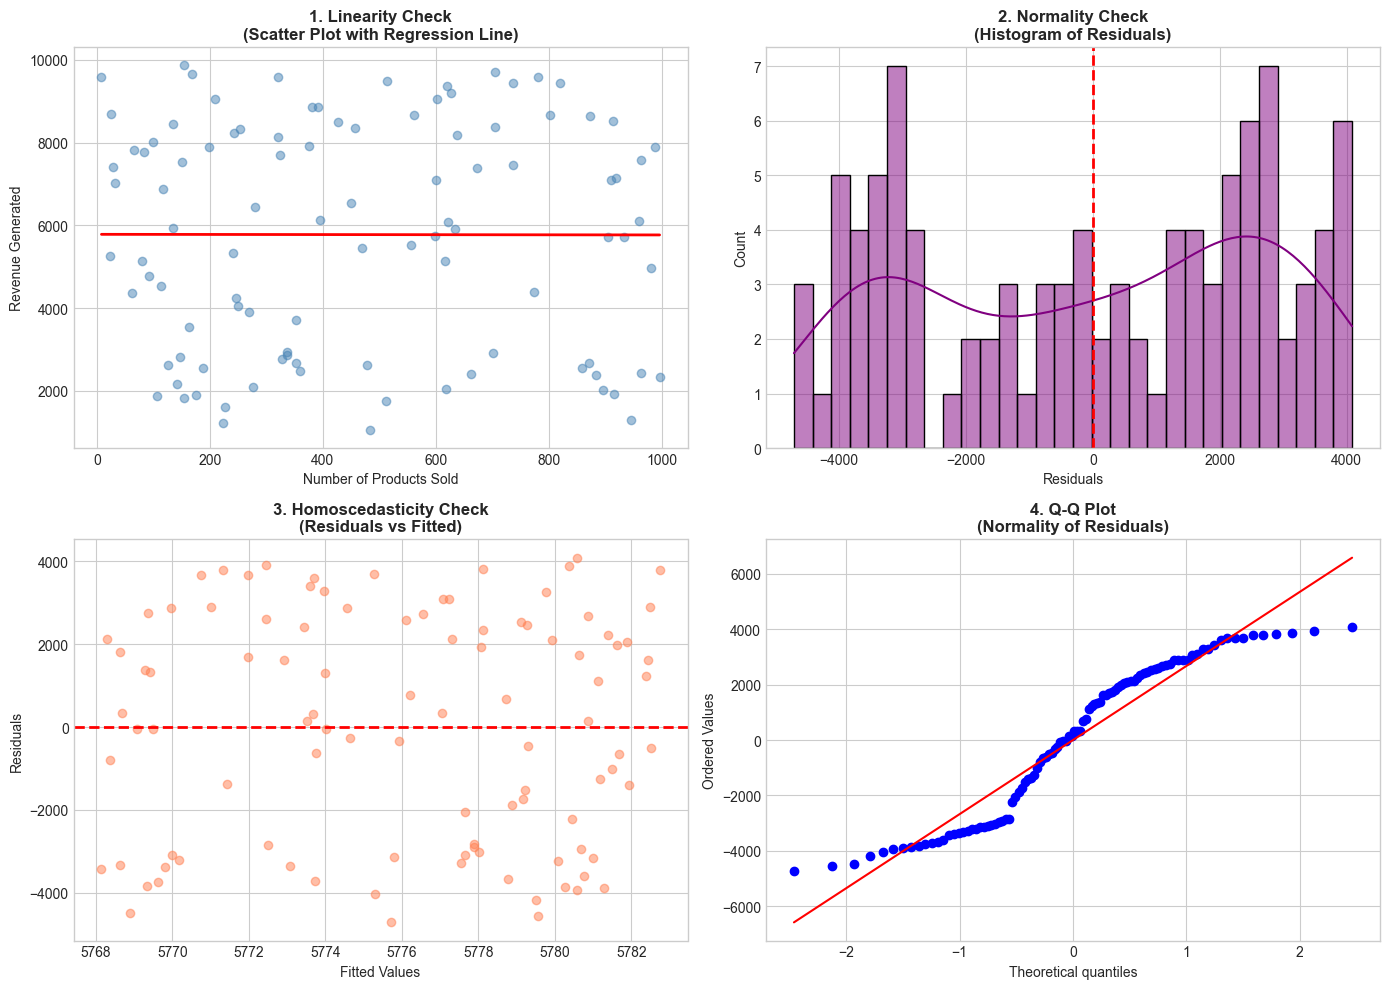


📊 STATISTICAL TESTS FOR ASSUMPTIONS
----------------------------------------------------------------------
✅ Shapiro-Wilk Test (Normality):
   Statistic: 0.9129, p-value: 0.0013
   Interpretation: Not Normal (α=0.05)

✅ Durbin-Watson Test (Independence):
   Statistic: 1.8661
   Interpretation: No autocorrelation


In [13]:
# =====================================================
# MODEL ASSUMPTIONS CHECKING
# =====================================================

print("=" * 70)
print("CHECKING MODEL ASSUMPTIONS")
print("=" * 70)

# Residual dihitung
residuals = model.resid
fitted_values = model.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. LINEARITY CHECK - Scatter Plot dengan Regression Line
ax1 = axes[0, 0]
ax1.scatter(df['Number of products sold'], df['Revenue generated'], alpha=0.5, color='steelblue')
ax1.plot(df['Number of products sold'].sort_values(), 
         model.predict(sm.add_constant(df['Number of products sold'].sort_values())), 
         color='red', linewidth=2)
ax1.set_xlabel('Number of Products Sold')
ax1.set_ylabel('Revenue Generated')
ax1.set_title('1. Linearity Check\n(Scatter Plot with Regression Line)', fontweight='bold')

# 2. NORMALITY CHECK - Histogram of Residuals
ax2 = axes[0, 1]
sns.histplot(residuals, kde=True, color='purple', ax=ax2, bins=30)
ax2.axvline(0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Residuals')
ax2.set_title('2. Normality Check\n(Histogram of Residuals)', fontweight='bold')

# 3. HOMOSCEDASTICITY CHECK - Residuals vs Fitted Values
ax3 = axes[1, 0]
ax3.scatter(fitted_values, residuals, alpha=0.5, color='coral')
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('Residuals')
ax3.set_title('3. Homoscedasticity Check\n(Residuals vs Fitted)', fontweight='bold')

# 4. Q-Q PLOT - Normality Check
ax4 = axes[1, 1]
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title('4. Q-Q Plot\n(Normality of Residuals)', fontweight='bold')

plt.tight_layout()
plt.savefig('regression_assumptions.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistical Tests untuk asumsi
print("\n📊 STATISTICAL TESTS FOR ASSUMPTIONS")
print("-" * 70)

# Shapiro-Wilk Test untuk normalitas (sample 50 untuk efisiensi)
sample_residuals = residuals.sample(min(50, len(residuals)), random_state=42)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"✅ Shapiro-Wilk Test (Normality):")
print(f"   Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print(f"   Interpretation: {'Normal' if shapiro_p > 0.05 else 'Not Normal'} (α=0.05)")

# Durbin-Watson Test untuk autokorelasi
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"\n✅ Durbin-Watson Test (Independence):")
print(f"   Statistic: {dw_stat:.4f}")
print(f"   Interpretation: {'No autocorrelation' if 1.5 < dw_stat < 2.5 else 'Possible autocorrelation'}")

### 4.3 Interpreting Model Output

- R-squared (R²): 0.0000
   → 0.00% variasi Revenue dapat dijelaskan oleh Products Sold


- Adjusted R-squared: -0.0102
   → Nilai R² yang telah disesuaikan dengan jumlah prediktor


- F-statistic: 0.0003
   → p-value: 0.9871
   → Model secara keseluruhan TIDAK SIGNIFIKAN pada α=0.05


- Coefficient Analysis:
   • Intercept (β₀): 5782.8547
     → Revenue baseline ketika Products Sold = 0
   • Slope (β₁): -0.0148
     → Setiap penambahan 1 unit produk terjual, Revenue berubah sebesar -0.0148


R² rendah menunjukkan bahwa jumlah produk terjual saja tidak cukup untuk memprediksi revenue. Faktor lain seperti harga, lokasi, atau jenis produk mungkin memiliki pengaruh yang lebih besar.

### 4.4 Refining Data for Simple Linear Regression

Pada tahap ini, variabel prediktor lain diuji untuk menemukan model yang lebih baik. Beberapa variabel alternatif dibandingkan untuk mengidentifikasi prediktor terkuat terhadap Revenue.

COMPARING DIFFERENT PREDICTORS

📊 Predictor Comparison (Target: Revenue Generated)


,Predictor,R-squared,Adj R-squared,Coefficient,P-value,Significant
3,Stock levels,0.0251,0.0152,-13.8065,0.1153,❌
1,Price,0.0015,-0.0087,3.3691,0.7043,❌
2,Production volumes,0.0014,-0.0088,-0.3890,0.7115,❌
0,Number of products sold,0.0000,-0.0102,-0.0148,0.9871,❌



🏆 Best Predictor: Stock levels
   R-squared: 0.0251


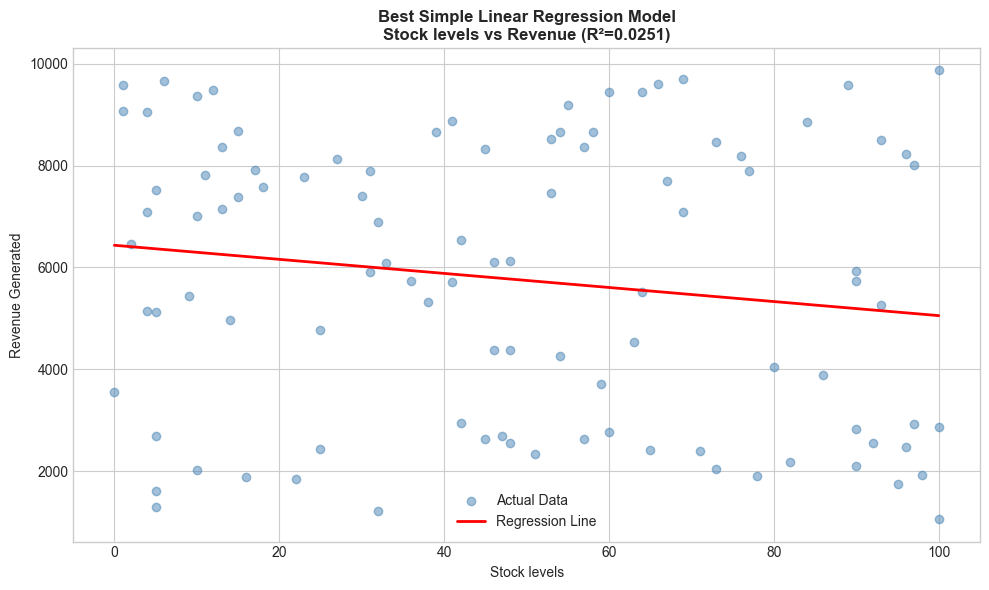

In [15]:
# =====================================================
# REFINING DATA FOR LINEAR REGRESSION
# =====================================================

print("=" * 70)
print("COMPARING DIFFERENT PREDICTORS")
print("=" * 70)

# Beberapa variabel prediktor dibandingkan
predictors = ['Number of products sold', 'Price', 'Production volumes', 'Stock levels']
y = df['Revenue generated']

results = []
for pred in predictors:
    X = sm.add_constant(df[pred])
    model_temp = sm.OLS(y, X).fit()
    results.append({
        'Predictor': pred,
        'R-squared': round(model_temp.rsquared, 4),
        'Adj R-squared': round(model_temp.rsquared_adj, 4),
        'Coefficient': round(model_temp.params[1], 4),
        'P-value': round(model_temp.pvalues[1], 4),
        'Significant': '✅' if model_temp.pvalues[1] < 0.05 else '❌'
    })

comparison_df = pd.DataFrame(results).sort_values('R-squared', ascending=False)
print("\n📊 Predictor Comparison (Target: Revenue Generated)")
display(comparison_df)

# Model terbaik dipilih berdasarkan R-squared
best_predictor = comparison_df.iloc[0]['Predictor']
print(f"\n🏆 Best Predictor: {best_predictor}")
print(f"   R-squared: {comparison_df.iloc[0]['R-squared']}")

# Model dengan prediktor terbaik divisualisasikan
X_best = sm.add_constant(df[best_predictor])
model_best = sm.OLS(y, X_best).fit()

plt.figure(figsize=(10, 6))
plt.scatter(df[best_predictor], y, alpha=0.5, color='steelblue', label='Actual Data')
plt.plot(df[best_predictor].sort_values(), 
         model_best.predict(sm.add_constant(df[best_predictor].sort_values())), 
         color='red', linewidth=2, label='Regression Line')
plt.xlabel(best_predictor)
plt.ylabel('Revenue Generated')
plt.title(f'Best Simple Linear Regression Model\n{best_predictor} vs Revenue (R²={model_best.rsquared:.4f})', 
          fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('best_regression_model.png', dpi=150, bbox_inches='tight')
plt.show()

# 5. Data Mining with Cluster Analysis

---

Cluster Analysis merupakan teknik unsupervised learning untuk mengelompokkan data berdasarkan kesamaan karakteristik. Dua metode clustering yang diterapkan:
1. **K-Means Clustering** - Partitioning method
2. **Hierarchical Clustering** - Agglomerative method

### 5.1 Explaining Clustering Analysis

Clustering analysis bekerja dengan prinsip:
- **Intra-cluster similarity**: Data dalam cluster yang sama harus mirip
- **Inter-cluster dissimilarity**: Data antar cluster berbeda harus berbeda

Sebelum clustering, data harus distandarisasi agar setiap fitur memiliki skala yang sama.

### 5.2 Partitioning using K-Means Clustering

K-Means merupakan algoritma clustering yang membagi data ke dalam K cluster berdasarkan jarak ke centroid. Langkah-langkah yang dilakukan:
1. Fitur numerik dipilih dan distandarisasi
2. Jumlah cluster optimal ditentukan menggunakan Elbow Method
3. Model K-Means diterapkan pada data

K-MEANS CLUSTERING
✅ 7 fitur dipilih untuk clustering
   Fitur: Price, Revenue generated, Stock levels, Order quantities, Shipping costs, Defect rates, Production volumes


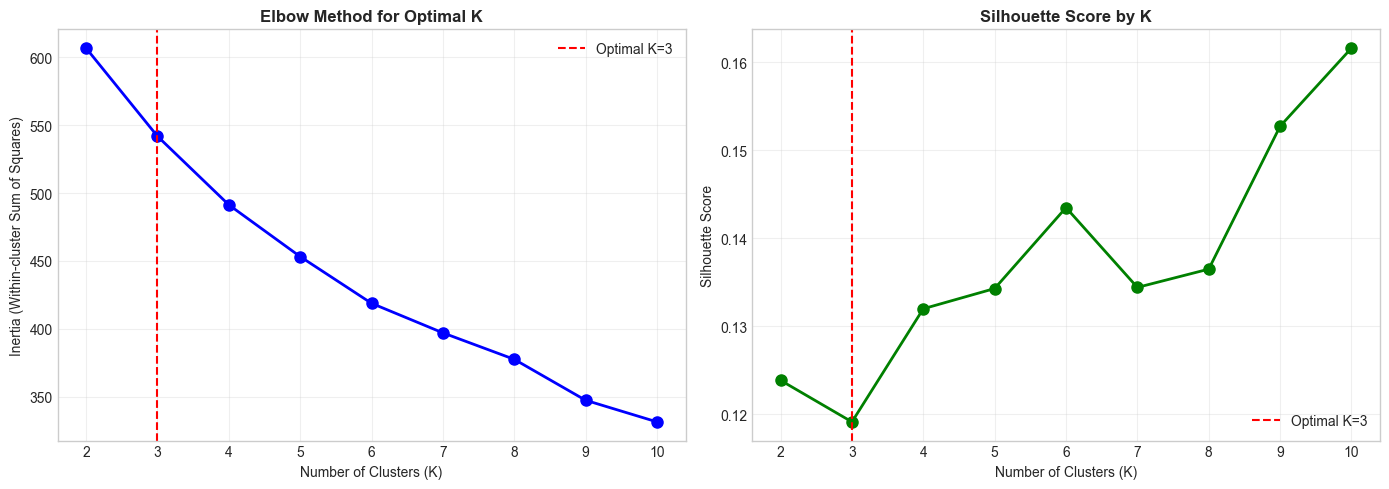


✅ K-Means Clustering selesai dengan K=3
📊 Silhouette Score: 0.1192


In [16]:
# =====================================================
# K-MEANS CLUSTERING
# =====================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("=" * 70)
print("K-MEANS CLUSTERING")
print("=" * 70)

# 1. Fitur untuk clustering dipilih
clustering_features = ['Price', 'Revenue generated', 'Stock levels', 'Order quantities', 
                       'Shipping costs', 'Defect rates', 'Production volumes']

X_cluster = df[clustering_features].copy()

# 2. Data distandarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print(f"✅ {len(clustering_features)} fitur dipilih untuk clustering")
print(f"   Fitur: {', '.join(clustering_features)}")

# 3. Elbow Method untuk menentukan K optimal
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow plot divisualisasikan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)')
axes[0].set_title('Elbow Method for Optimal K', fontweight='bold')
axes[0].axvline(x=3, color='r', linestyle='--', label='Optimal K=3')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score by K', fontweight='bold')
axes[1].axvline(x=3, color='r', linestyle='--', label='Optimal K=3')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_elbow_silhouette.png', dpi=150, bbox_inches='tight')
plt.show()

# 4. K-Means dengan K optimal diterapkan (K=3 berdasarkan elbow)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n✅ K-Means Clustering selesai dengan K={optimal_k}")
print(f"📊 Silhouette Score: {silhouette_score(X_scaled, df['KMeans_Cluster']):.4f}")

## 5.3 Clustering using Hierarchical Techniques

Hierarchical Clustering membangun hirarki cluster menggunakan pendekatan bottom-up (agglomerative). Dendrogram digunakan untuk memvisualisasikan struktur hirarki dan menentukan jumlah cluster optimal.

HIERARCHICAL CLUSTERING


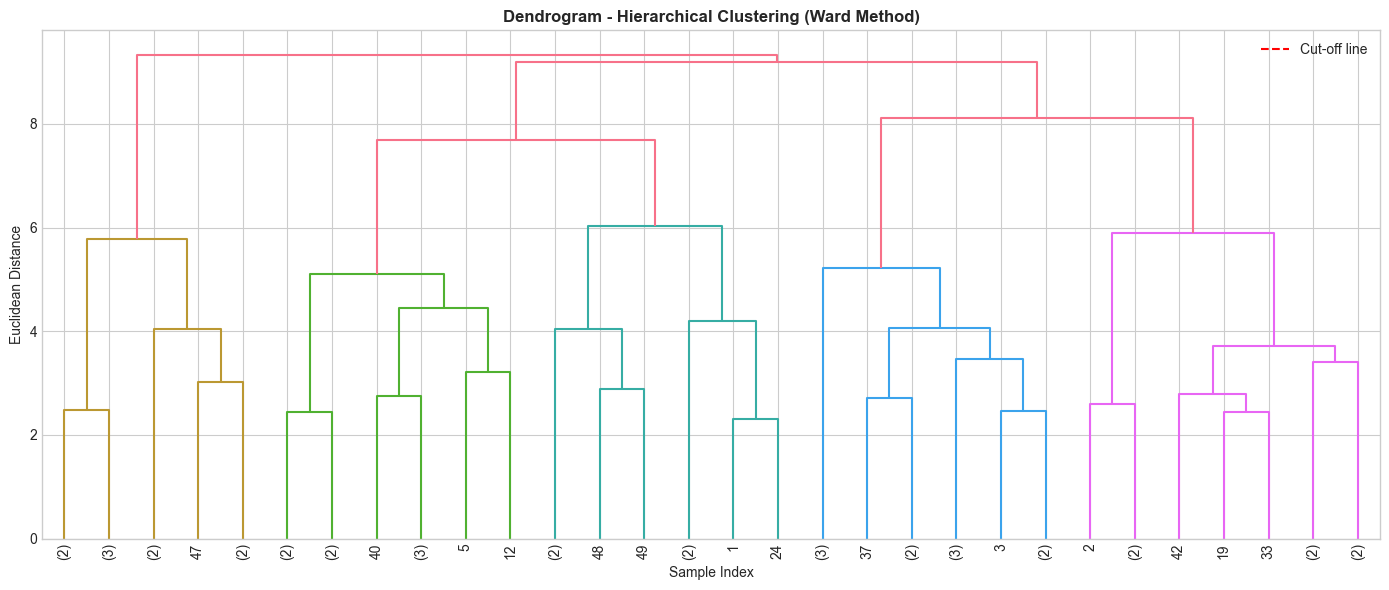


✅ Hierarchical Clustering selesai
📊 Silhouette Score: 0.0953

----------------------------------------------------------------------
CLUSTERING COMPARISON
----------------------------------------------------------------------

📊 Cross-tabulation K-Means vs Hierarchical:


Hierarchical_Cluster,0,1,2,Total
KMeans_Cluster,,,,
0,11,23,0,34
1,17,4,16,37
2,11,13,5,29
Total,39,40,21,100


In [17]:
# =====================================================
# HIERARCHICAL CLUSTERING
# =====================================================

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

print("=" * 70)
print("HIERARCHICAL CLUSTERING")
print("=" * 70)

# 1. Dendrogram dibuat untuk visualisasi hirarki
# Sampling data untuk efisiensi visualisasi dendrogram
sample_size = min(50, len(df))
X_sample = X_scaled[:sample_size]

plt.figure(figsize=(14, 6))
linkage_matrix = linkage(X_sample, method='ward')
dendrogram(linkage_matrix, 
           truncate_mode='lastp', 
           p=30,
           leaf_rotation=90,
           leaf_font_size=10)
plt.title('Dendrogram - Hierarchical Clustering (Ward Method)', fontweight='bold')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.axhline(y=10, color='r', linestyle='--', label='Cut-off line')
plt.legend()
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png', dpi=150, bbox_inches='tight')
plt.show()

# 2. Agglomerative Clustering diterapkan
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = agg_cluster.fit_predict(X_scaled)

print("\n✅ Hierarchical Clustering selesai")
print(f"📊 Silhouette Score: {silhouette_score(X_scaled, df['Hierarchical_Cluster']):.4f}")

# 3. Perbandingan hasil clustering
print("\n" + "-" * 70)
print("CLUSTERING COMPARISON")
print("-" * 70)

# Cross-tabulation antara K-Means dan Hierarchical
comparison = pd.crosstab(df['KMeans_Cluster'], df['Hierarchical_Cluster'], 
                         margins=True, margins_name='Total')
print("\n📊 Cross-tabulation K-Means vs Hierarchical:")
display(comparison)

CLUSTER VISUALIZATION & BUSINESS INTERPRETATION


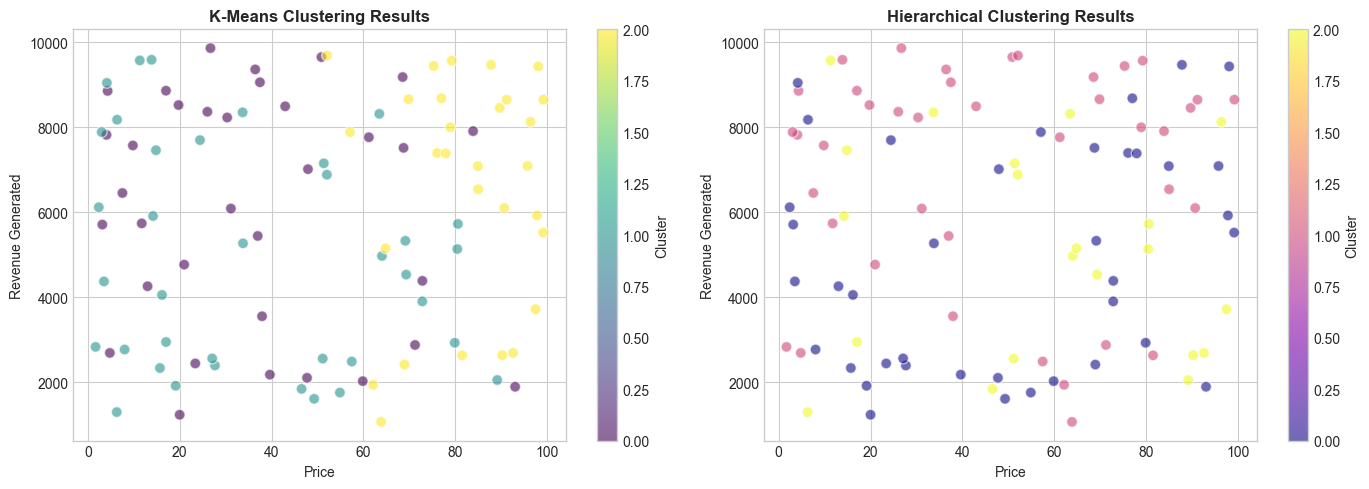


📊 K-MEANS CLUSTER CHARACTERISTICS
----------------------------------------------------------------------


,Price,Revenue generated,Stock levels,Order quantities,Shipping costs,Defect rates,Production volumes,Count
KMeans_Cluster,,,,,,,,
0,36.20,6114.35,36.59,43.56,2.91,2.14,627.65,34
1,36.10,4856.72,54.32,50.84,7.43,3.19,630.03,37
2,82.06,6552.35,52.52,53.79,6.24,1.28,418.38,29



BUSINESS INTERPRETATION

🏷️ CLUSTER 0:
   • Size: 34 products (34.0%)
   • Avg Price: $36.20
   • Avg Revenue: $6114.35
   • Avg Shipping Cost: $2.91

🏷️ CLUSTER 1:
   • Size: 37 products (37.0%)
   • Avg Price: $36.10
   • Avg Revenue: $4856.72
   • Avg Shipping Cost: $7.43

🏷️ CLUSTER 2:
   • Size: 29 products (29.0%)
   • Avg Price: $82.06
   • Avg Revenue: $6552.35
   • Avg Shipping Cost: $6.24


In [18]:
# =====================================================
# CLUSTER VISUALIZATION & INTERPRETATION
# =====================================================

print("=" * 70)
print("CLUSTER VISUALIZATION & BUSINESS INTERPRETATION")
print("=" * 70)

# 1. Visualisasi Cluster dalam 2D
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means Clusters
ax1 = axes[0]
scatter1 = ax1.scatter(df['Price'], df['Revenue generated'], 
                       c=df['KMeans_Cluster'], cmap='viridis', 
                       alpha=0.6, s=60, edgecolors='white')
ax1.set_xlabel('Price')
ax1.set_ylabel('Revenue Generated')
ax1.set_title('K-Means Clustering Results', fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Hierarchical Clusters
ax2 = axes[1]
scatter2 = ax2.scatter(df['Price'], df['Revenue generated'], 
                       c=df['Hierarchical_Cluster'], cmap='plasma', 
                       alpha=0.6, s=60, edgecolors='white')
ax2.set_xlabel('Price')
ax2.set_ylabel('Revenue Generated')
ax2.set_title('Hierarchical Clustering Results', fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

# 2. Karakteristik setiap cluster dianalisis
print("\n📊 K-MEANS CLUSTER CHARACTERISTICS")
print("-" * 70)
cluster_profile = df.groupby('KMeans_Cluster')[clustering_features].mean().round(2)
cluster_profile['Count'] = df.groupby('KMeans_Cluster').size()
display(cluster_profile)

# 3. Interpretasi bisnis untuk setiap cluster
print("\n" + "=" * 70)
print("BUSINESS INTERPRETATION")
print("=" * 70)

for cluster in sorted(df['KMeans_Cluster'].unique()):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(f"\n🏷️ CLUSTER {cluster}:")
    print(f"   • Size: {len(cluster_data)} products ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   • Avg Price: ${cluster_data['Price'].mean():.2f}")
    print(f"   • Avg Revenue: ${cluster_data['Revenue generated'].mean():.2f}")
    print(f"   • Avg Shipping Cost: ${cluster_data['Shipping costs'].mean():.2f}")

# 6. Time Series Analysis

---

Time Series Analysis merupakan teknik untuk menganalisis data yang dikumpulkan secara berurutan dalam waktu. Analisis ini penting untuk:

| Komponen | Deskripsi |
|----------|-----------|
| **Trend** | Pola jangka panjang (naik/turun) |
| **Seasonality** | Pola berulang dalam periode tertentu |
| **Cyclical** | Fluktuasi jangka panjang yang tidak teratur |
| **Noise** | Variasi random yang tidak dapat diprediksi |

Metode yang diterapkan meliputi Linear Regression, Decomposition, dan ARIMA.

### 6.1 Analyzing Time Series Data with Linear Regression

Pada tahap ini, tren temporal dianalisis menggunakan regresi linier. Variabel waktu dibuat sebagai indeks numerik untuk memodelkan perubahan Revenue terhadap waktu.

TIME SERIES ANALYSIS

📊 TREND ANALYSIS RESULTS
----------------------------------------------------------------------
✅ Slope (Daily Change): -6.25
✅ R-squared: 0.0044
✅ Trend Direction: DECREASING


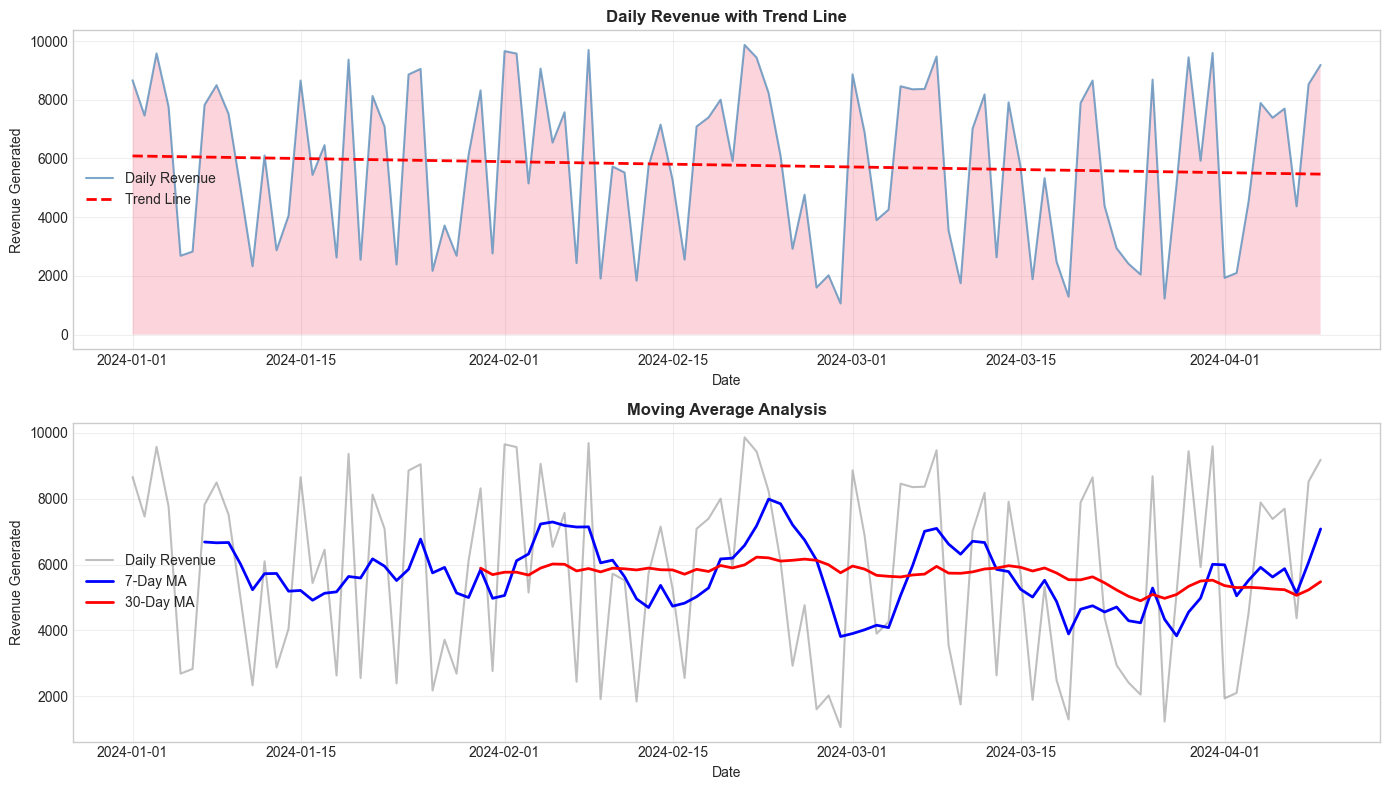

In [19]:
# =====================================================
# TIME SERIES ANALYSIS WITH LINEAR REGRESSION
# =====================================================

print("=" * 70)
print("TIME SERIES ANALYSIS")
print("=" * 70)

# 1. Kolom tanggal dibuat (simulasi data harian)
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
df['Time_Index'] = np.arange(len(df))

# 2. Agregasi harian untuk time series
ts_daily = df.groupby('Date').agg({
    'Revenue generated': 'sum',
    'Number of products sold': 'sum',
    'Shipping costs': 'sum'
}).reset_index()

ts_daily['Time_Index'] = np.arange(len(ts_daily))

# 3. Linear Regression untuk Trend Analysis
X_time = sm.add_constant(ts_daily['Time_Index'])
y_revenue = ts_daily['Revenue generated']
model_trend = sm.OLS(y_revenue, X_time).fit()
ts_daily['Trend_Line'] = model_trend.predict(X_time)

print("\n📊 TREND ANALYSIS RESULTS")
print("-" * 70)
print(f"✅ Slope (Daily Change): {model_trend.params[1]:.2f}")
print(f"✅ R-squared: {model_trend.rsquared:.4f}")
trend_direction = "INCREASING" if model_trend.params[1] > 0 else "DECREASING"
print(f"✅ Trend Direction: {trend_direction}")

# 4. Visualisasi Time Series dengan Trend
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Revenue Time Series
ax1 = axes[0]
ax1.plot(ts_daily['Date'], ts_daily['Revenue generated'], 
         color='steelblue', alpha=0.7, label='Daily Revenue')
ax1.plot(ts_daily['Date'], ts_daily['Trend_Line'], 
         color='red', linewidth=2, linestyle='--', label='Trend Line')
ax1.fill_between(ts_daily['Date'], ts_daily['Revenue generated'], alpha=0.3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue Generated')
ax1.set_title('Daily Revenue with Trend Line', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Moving Average
ts_daily['MA_7'] = ts_daily['Revenue generated'].rolling(window=7).mean()
ts_daily['MA_30'] = ts_daily['Revenue generated'].rolling(window=30).mean()

ax2 = axes[1]
ax2.plot(ts_daily['Date'], ts_daily['Revenue generated'], 
         color='gray', alpha=0.5, label='Daily Revenue')
ax2.plot(ts_daily['Date'], ts_daily['MA_7'], 
         color='blue', linewidth=2, label='7-Day MA')
ax2.plot(ts_daily['Date'], ts_daily['MA_30'], 
         color='red', linewidth=2, label='30-Day MA')
ax2.set_xlabel('Date')
ax2.set_ylabel('Revenue Generated')
ax2.set_title('Moving Average Analysis', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('timeseries_trend.png', dpi=150, bbox_inches='tight')
plt.show()

### 6.2 Introducing Key Elements of Time Series Analysis

Time series decomposition digunakan untuk memisahkan data menjadi komponen-komponen utama:
- **Trend**: Pola pergerakan jangka panjang
- **Seasonal**: Pola berulang dalam periode tertentu
- **Residual**: Noise atau variasi yang tidak dapat dijelaskan

TIME SERIES DECOMPOSITION


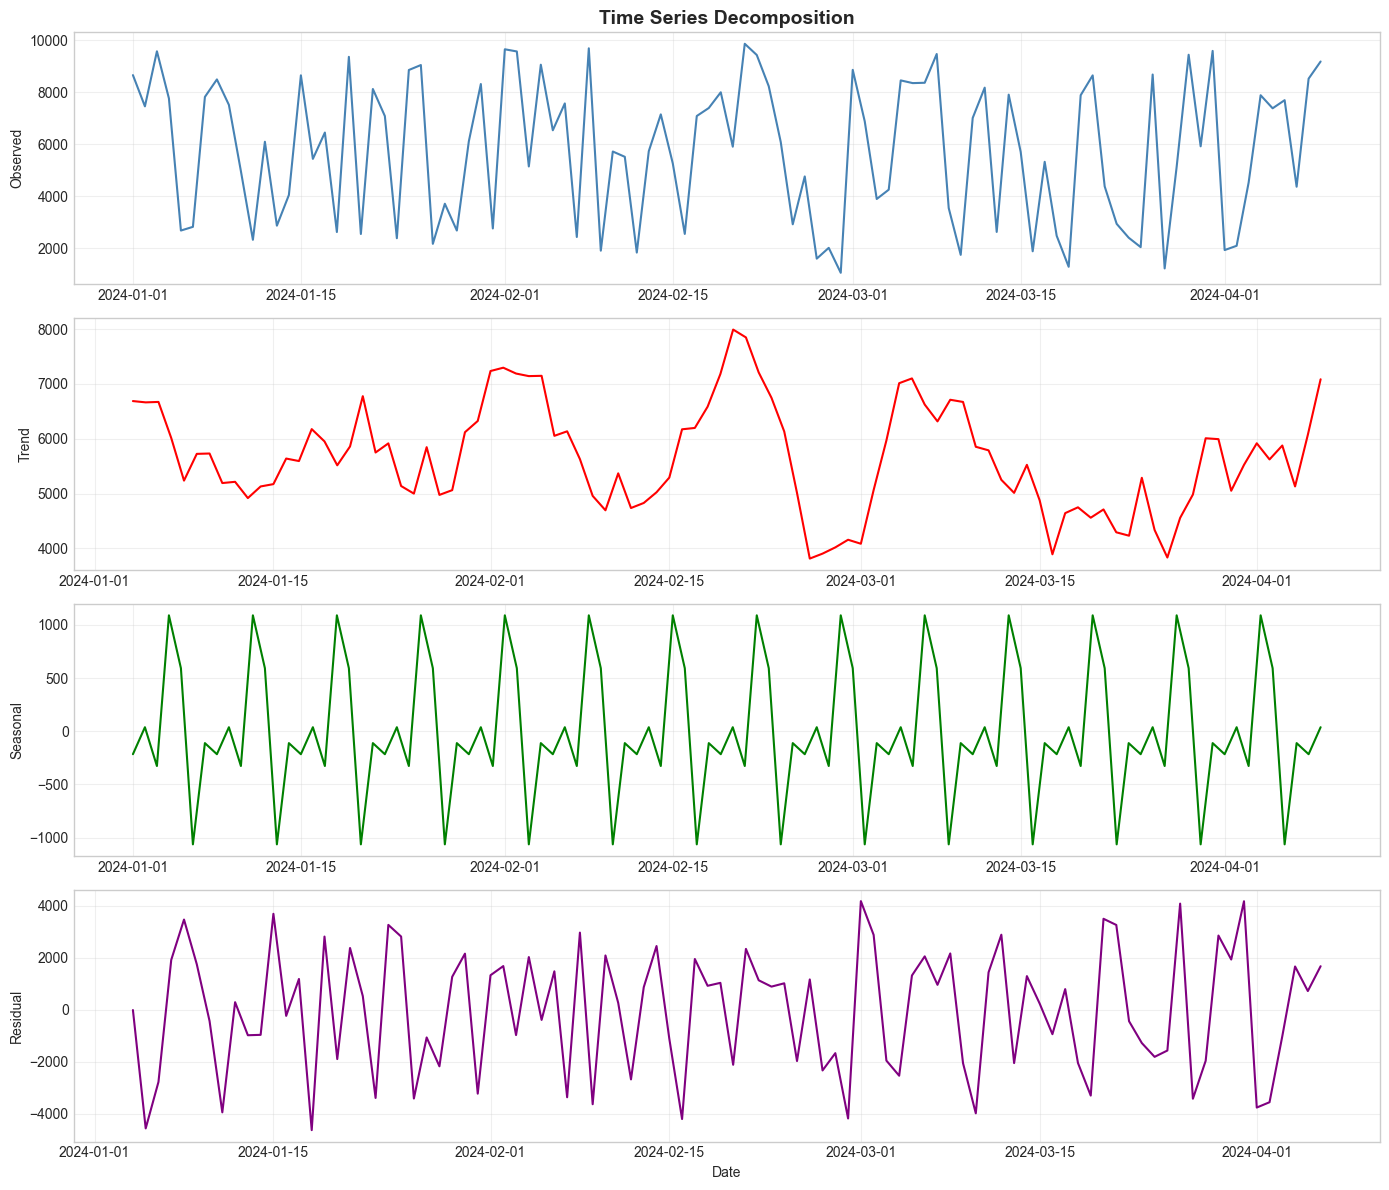


📊 DECOMPOSITION STATISTICS
----------------------------------------------------------------------
✅ Trend Range: 3814.53 - 7990.52
✅ Seasonal Amplitude: 2153.75
✅ Residual Std Dev: 2417.98


In [21]:
# =====================================================
# TIME SERIES DECOMPOSITION
# =====================================================

from statsmodels.tsa.seasonal import seasonal_decompose

print("=" * 70)
print("TIME SERIES DECOMPOSITION")
print("=" * 70)

# Data time series disiapkan dengan index tanggal
ts_data = ts_daily.set_index('Date')['Revenue generated']

# Decomposition dilakukan (periode=7 untuk pola mingguan)
decomposition = seasonal_decompose(ts_data, model='additive', period=7)

# Visualisasi komponen time series
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Original Data
axes[0].plot(decomposition.observed, color='steelblue')
axes[0].set_ylabel('Observed')
axes[0].set_title('Time Series Decomposition', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Trend Component
axes[1].plot(decomposition.trend, color='red')
axes[1].set_ylabel('Trend')
axes[1].grid(True, alpha=0.3)

# Seasonal Component
axes[2].plot(decomposition.seasonal, color='green')
axes[2].set_ylabel('Seasonal')
axes[2].grid(True, alpha=0.3)

# Residual Component
axes[3].plot(decomposition.resid, color='purple')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('timeseries_decomposition.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistik komponen ditampilkan
print("\n📊 DECOMPOSITION STATISTICS")
print("-" * 70)
print(f"✅ Trend Range: {decomposition.trend.min():.2f} - {decomposition.trend.max():.2f}")
print(f"✅ Seasonal Amplitude: {decomposition.seasonal.max() - decomposition.seasonal.min():.2f}")
print(f"✅ Residual Std Dev: {decomposition.resid.std():.2f}")

### 6.3 Building ARIMA Time Series Models

ARIMA (AutoRegressive Integrated Moving Average) merupakan model statistik untuk forecasting time series. Komponen ARIMA(p, d, q):
- **p**: Order autoregressive (AR)
- **d**: Degree of differencing (I)
- **q**: Order moving average (MA)

Model ARIMA digunakan untuk memprediksi nilai masa depan berdasarkan pola historis.

ARIMA TIME SERIES FORECASTING

📊 STATIONARITY TEST (Augmented Dickey-Fuller)
----------------------------------------------------------------------
✅ ADF Statistic: -9.3074
✅ p-value: 0.0000
✅ Interpretation: Stationary (α=0.05)

📊 BUILDING ARIMA MODEL
----------------------------------------------------------------------
✅ Model: ARIMA(1, 1, 1)
✅ AIC: 1856.54
✅ BIC: 1864.33


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


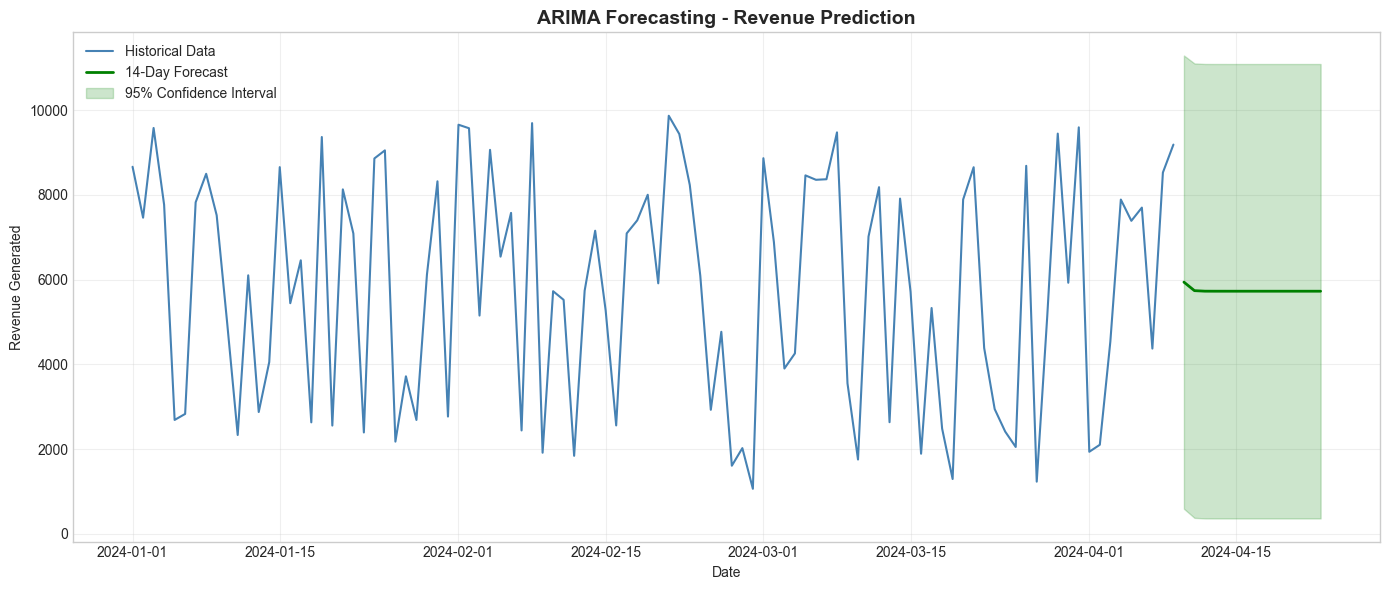


📊 FORECAST VALUES (Next 14 Days)
----------------------------------------------------------------------


,Date,Predicted Revenue,Lower CI,Upper CI
0,2024-04-10,5939.48,590.00,11288.96
1,2024-04-11,5738.14,375.13,11101.15
2,2024-04-12,5725.65,362.39,11088.91
3,2024-04-13,5724.87,361.60,11088.15
4,2024-04-14,5724.82,361.55,11088.10
5,2024-04-15,5724.82,361.54,11088.10
6,2024-04-16,5724.82,361.54,11088.10


In [22]:
# =====================================================
# ARIMA TIME SERIES MODEL
# =====================================================

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

print("=" * 70)
print("ARIMA TIME SERIES FORECASTING")
print("=" * 70)

# 1. Stationarity Check menggunakan ADF Test
print("\n📊 STATIONARITY TEST (Augmented Dickey-Fuller)")
print("-" * 70)
adf_result = adfuller(ts_data.dropna())
print(f"✅ ADF Statistic: {adf_result[0]:.4f}")
print(f"✅ p-value: {adf_result[1]:.4f}")
print(f"✅ Interpretation: {'Stationary' if adf_result[1] < 0.05 else 'Non-Stationary'} (α=0.05)")

# 2. Model ARIMA dibangun
print("\n📊 BUILDING ARIMA MODEL")
print("-" * 70)

# ARIMA(1,1,1) diterapkan
arima_model = ARIMA(ts_data, order=(1, 1, 1))
arima_results = arima_model.fit()

print(f"✅ Model: ARIMA(1, 1, 1)")
print(f"✅ AIC: {arima_results.aic:.2f}")
print(f"✅ BIC: {arima_results.bic:.2f}")

# 3. Forecasting 14 hari ke depan
forecast_steps = 14
forecast = arima_results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# 4. Visualisasi Forecast
plt.figure(figsize=(14, 6))

# Historical data
plt.plot(ts_data.index, ts_data.values, color='steelblue', label='Historical Data')

# Forecast
forecast_index = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), 
                                periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_mean, color='green', linewidth=2, 
         label=f'{forecast_steps}-Day Forecast')

# Confidence interval
plt.fill_between(forecast_index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='green', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Revenue Generated')
plt.title('ARIMA Forecasting - Revenue Prediction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('arima_forecast.png', dpi=150, bbox_inches='tight')
plt.show()

# 5. Forecast values ditampilkan
print("\n📊 FORECAST VALUES (Next 14 Days)")
print("-" * 70)
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted Revenue': forecast_mean.values.round(2),
    'Lower CI': conf_int.iloc[:, 0].values.round(2),
    'Upper CI': conf_int.iloc[:, 1].values.round(2)
})
display(forecast_df.head(7))

# 7. Visualizing the Data's Story

---

Visualisasi data merupakan komponen kritis dalam Business Intelligence untuk mengkomunikasikan insight secara efektif. Tiga jenis visualisasi yang diterapkan:

| Jenis | Library | Kegunaan |
|-------|---------|----------|
| **Static Plots** | Seaborn + Matplotlib | Laporan dan presentasi |
| **Geo-mapping** | Folium | Visualisasi data geografis |
| **Interactive Graphics** | Plotly | Dashboard dan eksplorasi interaktif |

Visualisasi yang baik harus informatif, mudah dipahami, dan relevan dengan konteks bisnis.

### 7.1 Visualizing Data & Plotting with Seaborn/Matplotlib

STATIC DATA VISUALIZATION


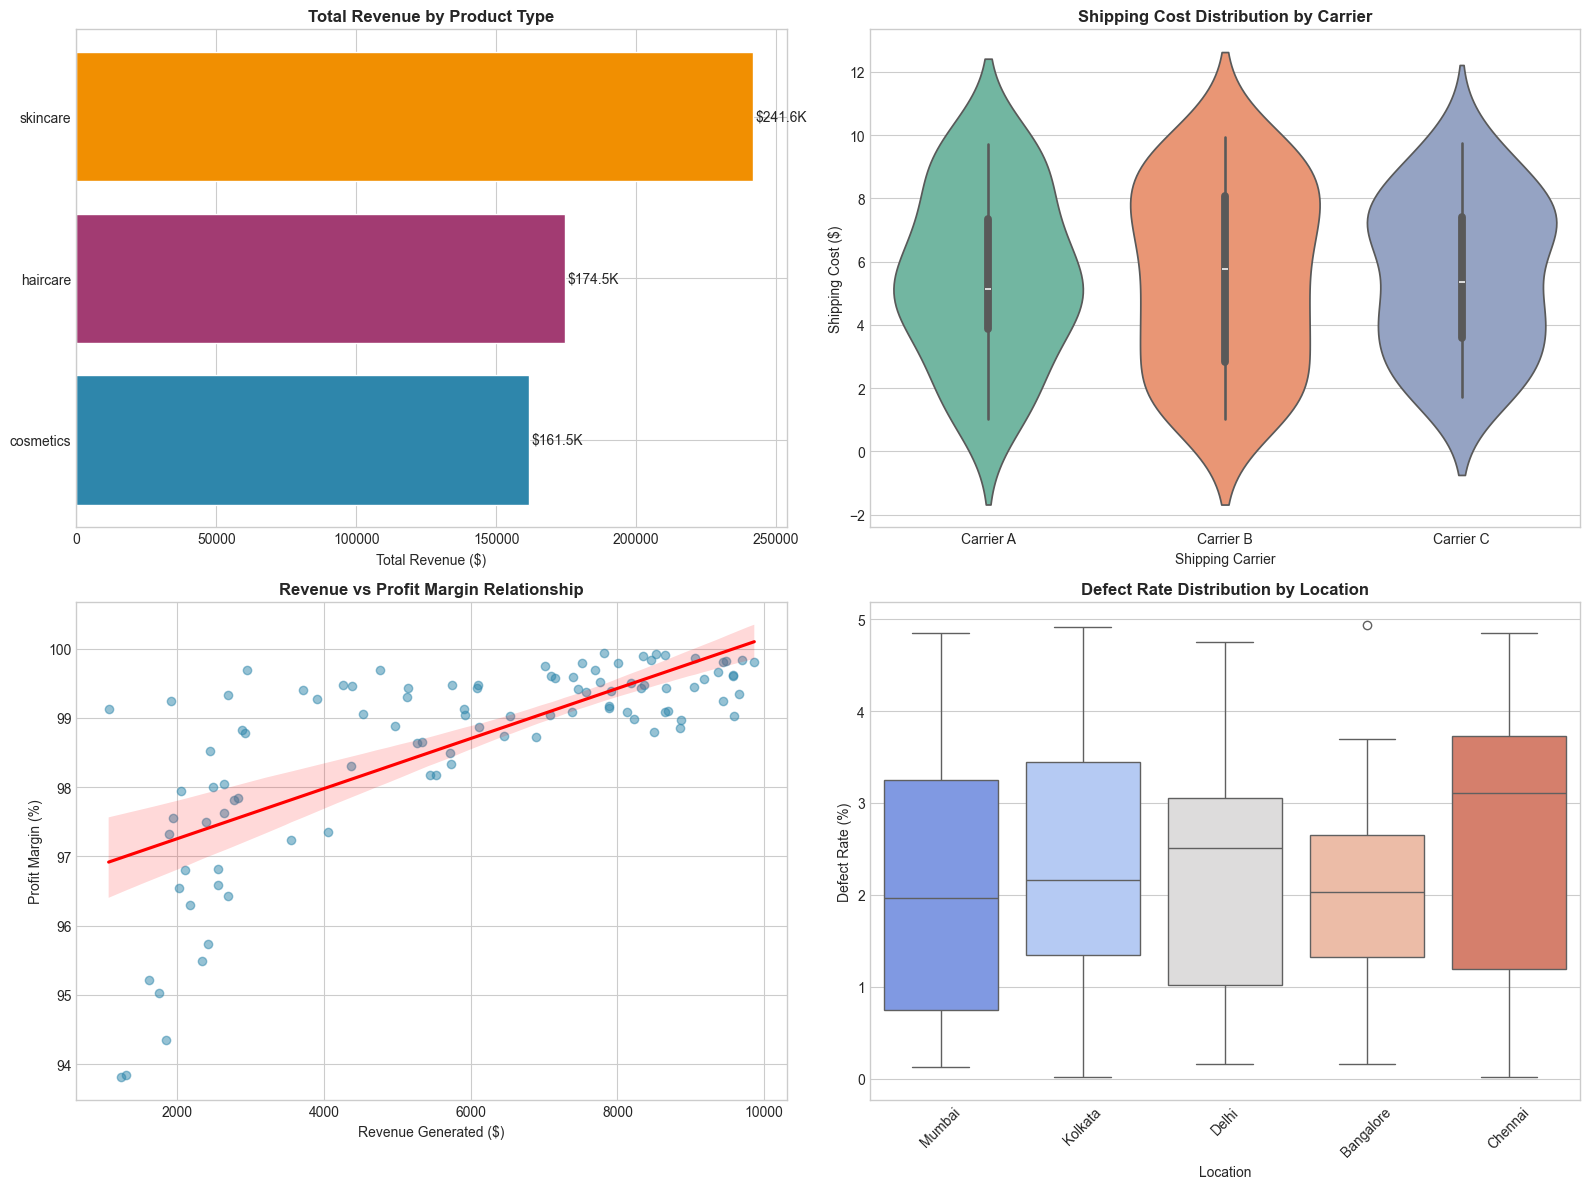


✅ Visualisasi statis telah dibuat dan disimpan


In [23]:
# =====================================================
# STATIC VISUALIZATION WITH SEABORN & MATPLOTLIB
# =====================================================

print("=" * 70)
print("STATIC DATA VISUALIZATION")
print("=" * 70)

# Custom color palette
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue by Product Type (Bar Chart)
ax1 = axes[0, 0]
revenue_by_product = df.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=True)
bars = ax1.barh(revenue_by_product.index, revenue_by_product.values, color=colors[:3], edgecolor='white')
ax1.set_xlabel('Total Revenue ($)')
ax1.set_title('Total Revenue by Product Type', fontsize=12, fontweight='bold')
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 1000, bar.get_y() + bar.get_height()/2, 
             f'${width/1000:.1f}K', va='center', fontsize=10)

# 2. Shipping Costs Distribution by Carrier (Violin Plot)
ax2 = axes[0, 1]
sns.violinplot(data=df, x='Shipping carriers', y='Shipping costs', 
               palette='Set2', ax=ax2)
ax2.set_xlabel('Shipping Carrier')
ax2.set_ylabel('Shipping Cost ($)')
ax2.set_title('Shipping Cost Distribution by Carrier', fontsize=12, fontweight='bold')

# 3. Revenue vs Profit Margin (Scatter with Regression)
ax3 = axes[1, 0]
sns.regplot(data=df, x='Revenue generated', y='Profit Margin (%)', 
            scatter_kws={'alpha': 0.5, 'color': colors[0]},
            line_kws={'color': 'red'}, ax=ax3)
ax3.set_xlabel('Revenue Generated ($)')
ax3.set_ylabel('Profit Margin (%)')
ax3.set_title('Revenue vs Profit Margin Relationship', fontsize=12, fontweight='bold')

# 4. Defect Rate by Location (Box Plot)
ax4 = axes[1, 1]
sns.boxplot(data=df, x='Location', y='Defect rates', palette='coolwarm', ax=ax4)
ax4.set_xlabel('Location')
ax4.set_ylabel('Defect Rate (%)')
ax4.set_title('Defect Rate Distribution by Location', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('static_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Visualisasi statis telah dibuat dan disimpan")

## 7.2 Geo-mapping using Folium

Visualisasi geografis dibuat menggunakan library Folium untuk menampilkan distribusi operasional supply chain berdasarkan lokasi. Marker pada peta menunjukkan volume dan biaya di setiap kota.

In [24]:
# =====================================================
# GEO-MAPPING WITH FOLIUM
# =====================================================

import folium
from folium.plugins import MarkerCluster

print("=" * 70)
print("GEO-MAPPING VISUALIZATION")
print("=" * 70)

# 1. Koordinat kota-kota dalam dataset didefinisikan
city_coords = {
    'Mumbai': [19.0760, 72.8777],
    'Delhi': [28.6139, 77.2090],
    'Kolkata': [22.5726, 88.3639],
    'Chennai': [13.0827, 80.2707],
    'Bangalore': [12.9716, 77.5946]
}

# 2. Data per lokasi diagregasi
location_stats = df.groupby('Location').agg({
    'Revenue generated': 'sum',
    'Costs': 'mean',
    'Production volumes': 'sum',
    'Defect rates': 'mean'
}).reset_index()

print("\n📊 LOCATION STATISTICS")
print("-" * 70)
display(location_stats)

# 3. Peta dasar dibuat dengan center di India
m = folium.Map(
    location=[20.5937, 78.9629], 
    zoom_start=5,
    tiles='cartodbpositron'
)

# 4. Marker untuk setiap lokasi ditambahkan
for idx, row in location_stats.iterrows():
    city = row['Location']
    if city in city_coords:
        # Radius berdasarkan revenue (normalized)
        radius = (row['Revenue generated'] / location_stats['Revenue generated'].max()) * 30 + 10
        
        # Warna berdasarkan defect rate
        if row['Defect rates'] < 2:
            color = 'green'
        elif row['Defect rates'] < 3:
            color = 'orange'
        else:
            color = 'red'
        
        # Popup content
        popup_content = f"""
        <div style="font-family: Arial; width: 200px;">
            <h4 style="margin-bottom: 10px;">{city}</h4>
            <b>Revenue:</b> ${row['Revenue generated']:,.0f}<br>
            <b>Avg Cost:</b> ${row['Costs']:.2f}<br>
            <b>Production:</b> {row['Production volumes']:,.0f}<br>
            <b>Defect Rate:</b> {row['Defect rates']:.2f}%
        </div>
        """
        
        # Circle marker ditambahkan
        folium.CircleMarker(
            location=city_coords[city],
            radius=radius,
            popup=folium.Popup(popup_content, max_width=250),
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            weight=2
        ).add_to(m)
        
        # Label kota ditambahkan
        folium.Marker(
            location=city_coords[city],
            icon=folium.DivIcon(
                html=f'<div style="font-size: 10pt; font-weight: bold; color: black;">{city}</div>'
            )
        ).add_to(m)

# 5. Legend ditambahkan
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000;
            background-color: white; padding: 10px; border-radius: 5px;
            border: 2px solid gray; font-family: Arial;">
    <h4 style="margin: 0 0 10px 0;">Defect Rate Legend</h4>
    <p style="margin: 2px;"><span style="color: green;">●</span> Low (&lt;2%)</p>
    <p style="margin: 2px;"><span style="color: orange;">●</span> Medium (2-3%)</p>
    <p style="margin: 2px;"><span style="color: red;">●</span> High (&gt;3%)</p>
    <p style="margin: 10px 0 0 0; font-size: 10px;">Circle size = Revenue</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 6. Peta disimpan sebagai HTML
m.save('supply_chain_map.html')
print("\n✅ Peta interaktif telah disimpan sebagai 'supply_chain_map.html'")

# Display map in notebook
m

GEO-MAPPING VISUALIZATION

📊 LOCATION STATISTICS
----------------------------------------------------------------------


,Location,Revenue generated,Costs,Production volumes,Defect rates
0,Bangalore,102601.723882,586.706747,7827,2.093640
1,Chennai,119142.815748,621.750660,11984,2.638256
2,Delhi,81027.701225,548.237877,8362,2.228639
3,Kolkata,137077.551005,491.269802,15451,2.285766
4,Mumbai,137755.026877,428.342290,13160,2.122339



✅ Peta interaktif telah disimpan sebagai 'supply_chain_map.html'


### 7.3 Creating Interactive Graphics using Plotly

Visualisasi interaktif dibuat menggunakan Plotly untuk memungkinkan eksplorasi data secara dinamis. Grafik interaktif mendukung zoom, hover, dan filtering yang memudahkan analisis mendalam.

In [25]:
# =====================================================
# INTERACTIVE VISUALIZATION WITH PLOTLY
# =====================================================

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("=" * 70)
print("INTERACTIVE VISUALIZATION WITH PLOTLY")
print("=" * 70)

# 1. Interactive Scatter Plot - Price vs Revenue
fig1 = px.scatter(
    df, 
    x='Price', 
    y='Revenue generated',
    color='Product type',
    size='Number of products sold',
    hover_data=['SKU', 'Location', 'Supplier name', 'Profit'],
    title='Interactive Analysis: Price vs Revenue',
    labels={'Price': 'Product Price ($)', 'Revenue generated': 'Revenue Generated ($)'},
    template='plotly_white'
)
fig1.update_layout(
    height=500,
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)
fig1.write_html('interactive_scatter.html')
print("✅ Interactive scatter plot disimpan sebagai 'interactive_scatter.html'")

# 2. Interactive Sunburst Chart - Revenue Breakdown
fig2 = px.sunburst(
    df,
    path=['Product type', 'Location', 'Shipping carriers'],
    values='Revenue generated',
    title='Revenue Breakdown by Product, Location & Carrier',
    color='Revenue generated',
    color_continuous_scale='Viridis'
)
fig2.update_layout(height=600)
fig2.write_html('interactive_sunburst.html')
print("✅ Interactive sunburst chart disimpan sebagai 'interactive_sunburst.html'")

# 3. Interactive Bar Chart with Animation
monthly_data = df.copy()
monthly_data['Month'] = monthly_data['Date'].dt.strftime('%Y-%m')
monthly_summary = monthly_data.groupby(['Month', 'Product type'])['Revenue generated'].sum().reset_index()

fig3 = px.bar(
    monthly_summary,
    x='Product type',
    y='Revenue generated',
    color='Product type',
    animation_frame='Month',
    title='Monthly Revenue by Product Type (Animated)',
    labels={'Revenue generated': 'Revenue ($)'},
    template='plotly_white'
)
fig3.update_layout(height=500)
fig3.write_html('interactive_animated_bar.html')
print("✅ Interactive animated bar chart disimpan sebagai 'interactive_animated_bar.html'")

# 4. Interactive Dashboard - Combined Metrics
fig4 = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Revenue by Product', 'Shipping Cost by Mode', 
                   'Defect Rate by Supplier', 'Profit Distribution'),
    specs=[[{'type': 'pie'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'histogram'}]]
)

# Pie Chart - Revenue by Product
product_revenue = df.groupby('Product type')['Revenue generated'].sum()
fig4.add_trace(
    go.Pie(labels=product_revenue.index, values=product_revenue.values, name='Revenue'),
    row=1, col=1
)

# Bar Chart - Shipping Cost by Mode
mode_cost = df.groupby('Transportation modes')['Shipping costs'].mean()
fig4.add_trace(
    go.Bar(x=mode_cost.index, y=mode_cost.values, name='Shipping Cost', marker_color='coral'),
    row=1, col=2
)

# Bar Chart - Defect Rate by Supplier
supplier_defect = df.groupby('Supplier name')['Defect rates'].mean().sort_values()
fig4.add_trace(
    go.Bar(x=supplier_defect.index, y=supplier_defect.values, name='Defect Rate', marker_color='steelblue'),
    row=2, col=1
)

# Histogram - Profit Distribution
fig4.add_trace(
    go.Histogram(x=df['Profit'], name='Profit', marker_color='green', nbinsx=30),
    row=2, col=2
)

fig4.update_layout(height=700, title_text='Supply Chain Dashboard - Key Metrics', showlegend=False)
fig4.write_html('interactive_analysis.html')
print("✅ Interactive dashboard disimpan sebagai 'interactive_analysis.html'")

print("\n" + "=" * 70)
print("✅ Semua visualisasi interaktif telah berhasil dibuat dan disimpan!")
print("=" * 70)

INTERACTIVE VISUALIZATION WITH PLOTLY
✅ Interactive scatter plot disimpan sebagai 'interactive_scatter.html'
✅ Interactive sunburst chart disimpan sebagai 'interactive_sunburst.html'
✅ Interactive animated bar chart disimpan sebagai 'interactive_animated_bar.html'
✅ Interactive dashboard disimpan sebagai 'interactive_analysis.html'

✅ Semua visualisasi interaktif telah berhasil dibuat dan disimpan!


# 8. Web Dashboards with Streamlit

Tahap ini merupakan implementasi solusi Business Intelligence ke dalam platform berbasis web untuk visualisasi data secara interaktif dan dinamis

### 8.1 Creating a Project Case-Based Dashboard

Aplikasi dibangun menggunakan framework Streamlit, Dashboard dibagi menjadi tiga modul utama:
- Overview & Performance: Menampilkan tren pendapatan harian dan distribusi kategori produk.
- Deep Analysis: Visualisasi hasil K-Means Clustering yang membagi produk menjadi segmen Value, Standard, dan Premium, serta analisis matriks risiko pemasok.
- Forecasting & Insights: Menampilkan proyeksi pendapatan 30 hari ke depan menggunakan model regresi linier.

### 8.2 Dashboard Features & Interactive Graphics

Dashboard ini menyediakan enam metrik KPI utama (Revenue, Products Sold, Profit Margin, Lead Time, Defect Rate, dan Total Cost) yang dilengkapi dengan indikator perubahan (delta). Fitur filter pada sidebar memungkinkan pengguna menyaring data berdasarkan jenis produk, nama pemasok, dan lokasi secara real-time.

# 9. Rekomendasi Strategi Bisnis

Berdasarkan visualisasi pada dashboard, berikut adalah rekomendasi strategis untuk perusahaan:


- Strategi Pengadaan (Supplier Risk): Melalui Supplier Risk Matrix pada Tab Deep Analysis, perusahaan perlu melakukan evaluasi terhadap pemasok dengan defect rate tinggi namun volume produksi besar untuk menjaga efisiensi biaya produksi.


- Optimasi Logistik: Berdasarkan analisis Carrier Performance, perusahaan disarankan memprioritaskan moda transportasi atau kurir yang memiliki Lead Time paling rendah untuk meningkatkan kepuasan pelanggan.

- Manajemen Stok Dinamis: Hasil 30-Day Projection pada modul Forecasting menunjukkan estimasi pertumbuhan sebesar +X.X%. Hal ini harus diikuti dengan penyesuaian stok di gudang agar tidak terjadi stockout pada periode puncak.